<a href="https://colab.research.google.com/github/fabriziobasso/Time_Series_Files/blob/main/TS_Study_v7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementing Seq2Seq Models for Efficient Time Series Forecasting**
Including attention, covariates, probabilistic forecasting, scheduled sampling, and more

Based on Article: [Link](https://medium.com/@maxbrenner-ai/implementing-seq2seq-models-for-efficient-time-series-forecasting-88dba1d66187)

Repo: [Link](https://github.com/maxbrenner-ai/seq2seq-time-series-forecasting-fully-recurrent/blob/main/notebook.ipynb)

Material from these links also considered:

Article: [Link](https://medium.com/@shouke.wei/a-lstm-based-seq2seq-model-for-time-series-forecasting-3730822301c5)


## Seq2Seq Models (Encoder & Decoder)
Seq2seq models have grown more and more popular for dealing with sequential or temporal data in deep learning. They primarily originated with NLP problems such as machine translation and text generation. As the name implies, they are a type of model that simply takes as input a sequence and outputs a sequence in response. However, the internals of the model can vary from recurrent, to convolutional, to transformers, to hybrids. So it can be thought of as more of a paradigm or generic structure for dealing with temporal data. Seq2seq models are usually made up of an encoder, which compresses the input sequence into a latent context vector, and a decoder, which learns to understand this context vector and produces an appropriate output sequence.

Now we will get into the details of these models along with other useful aspects of dealing with time series data.

## 1.0 Install Packages:

In [1]:
%%capture
!pip install tensorflow-addons
#!pip install shap
#!pip install eli5
#!pip install tf-nightly
#!pip install -U scikit-learn==1.2.0
#!pip install catboost
#!pip install haversine
#!pip install umap-learn
#!pip install reverse_geocoder
#!pip install --upgrade protobuf
!pip install colorama
!pip install imbalanced-learn
!pip install optuna
!pip install optuna-integration
#!pip install pygam
!pip install keras-tuner --upgrade
#!pip install pycaret

## **2.0 Packages**

In [2]:
#importing modules

import warnings
warnings.filterwarnings('ignore')
import time
t = time.time()

print('Importing started...')

# basic moduele
import os
import numpy as np
import pandas as pd
import re
#from scipy import stats
from random import randint
import random
import math
import os
import gc
import pickle
from glob import glob
from IPython import display as ipd
from tqdm import tqdm
from datetime import datetime
from joblib import dump, load
import sklearn as sk
from imblearn.over_sampling import SMOTE, RandomOverSampler
from functools import partial
import itertools
from itertools import combinations
import IPython
import IPython.display

# visualization moduels
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import missingno as msno
import imblearn

# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# Style Import
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# preprocessing modules
from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     StratifiedKFold,
                                     cross_val_score,
                                     GroupKFold,
                                     GridSearchCV,
                                     RepeatedStratifiedKFold)

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   OrdinalEncoder,
                                   PolynomialFeatures)

from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectFromModel


# metrics
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss)


# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  TweedieRegressor,
                                  ARDRegression,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              ExtraTreesClassifier)

from sklearn.base import BaseEstimator, TransformerMixin

# Other Models
#from pygam import LogisticGAM, s, te
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

#import catboost as cat
#from catboost import CatBoost, CatBoostRegressor
#from catboost import CatBoostClassifier

#from catboost.utils import get_roc_curve

from lightgbm import early_stopping
# check installed version
#import pycaret

from sklearn.base import clone ## sklearn base models for stacked ensemble model
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

#Interpretiability of the model
#import shap
#import eli5
#from eli5.sklearn import PermutationImportance


## miss
from sklearn.pipeline import (make_pipeline,
                              Pipeline)


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K
import tensorflow_addons as tfa
from keras.utils import FeatureSpace

# Import libraries for Hypertuning
import kerastuner as kt
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization
# Model Tuning tools:
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour

SEED = 1984
N_SPLITS = 10

print('Done, All the required modules are imported. Time elapsed: {} sec'.format(time.time()-t))

Importing started...
Done, All the required modules are imported. Time elapsed: 7.5702245235443115 sec


<Figure size 640x480 with 0 Axes>

In [3]:
# Check Versions:
print("CHECK VERSIONS:")
print(f"sns: {sns.__version__}")
print(f"mpl: {mpl.__version__}")
print(f"tensorflow: {tf.__version__}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"scikit-learn: {sk.__version__}")
#print(f"statsmodels: {stm.__version__}")
print(f"missingno: {msno.__version__}")
#print(f"TF-addon: {tfa.__version__}")
print(f"Inbalance_Learning: {imblearn.__version__}")
print(f"XGBoost: {xgb.__version__}")
#print(f"CatBoost: {cat.__version__}")
#print(f"PyCaret: {pycaret.__version__}")

CHECK VERSIONS:
sns: 0.12.2
mpl: 3.7.1
tensorflow: 2.12.0
pandas: 1.5.3
numpy: 1.23.5
scikit-learn: 1.2.2
missingno: 0.5.2
Inbalance_Learning: 0.10.1
XGBoost: 1.7.6


**Settings:**

In [4]:
tf.random.set_seed(0)
np.random.seed(0)
random.seed(42)

SEED = 42
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.compat.v1.set_random_seed(seed)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

seed_everything(SEED)

In [5]:
input_seq_length = 48
output_seq_length = 24

lr = 0.001
num_epochs = 100
batch_size = 128
hidden_size = 32
num_gru_layers = 1
grad_clip = 1.0
scheduled_sampling_decay = 10
dropout = 0.25

### **2.1 Connect Drives**

Verify System:

In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Aug 19 00:34:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W /  70W |    413MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Connect to Google Drive:

In [7]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
folder_data = "/content/drive/MyDrive/Exercises/Time_Series_Studies/Data/TS_Models_tf"
folder_train_valid = "/content/drive/MyDrive/Exercises/Time_Series_Studies/Data/train_valid_data"
models_folders = "/content/drive/MyDrive/Exercises/Time_Series_Studies/Models/TS_Study_0"
folders_nn = "/content/drive/MyDrive/Exercises/Time_Series_Studies/Models/TS_Study_0/neural_networks/"

list_directories = [folder_data,folder_train_valid,models_folders,folders_nn]

for path in list_directories:
  try:
      os.mkdir(path)
  except OSError as error:
      print(f"{path} already exists")


os.chdir(folder_data)

/content/drive/MyDrive/Exercises/Time_Series_Studies/Data/TS_Models_tf already exists
/content/drive/MyDrive/Exercises/Time_Series_Studies/Data/train_valid_data already exists
/content/drive/MyDrive/Exercises/Time_Series_Studies/Models/TS_Study_0 already exists
/content/drive/MyDrive/Exercises/Time_Series_Studies/Models/TS_Study_0/neural_networks/ already exists


### 2.2 Utility Functions:

In [9]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

# inverse sigmoid decay from https://arxiv.org/pdf/1506.03099.pdf
def inverse_sigmoid_decay(decay):
    def compute(indx):
        return decay / (decay + math.exp(indx / decay))
    return compute


def model_fit(model, window, patience=2, Max_ep=100):

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=Max_ep,
                      validation_data=window.val,
                      callbacks=[early_stopping])

  return history

In [10]:
calc_teacher_force_prob = inverse_sigmoid_decay(scheduled_sampling_decay)

f'At epoch {num_epochs} teacher force prob will be {calc_teacher_force_prob(num_epochs-1)}'

'At epoch 100 teacher force prob will be 0.0005014951969411607'

In [11]:
class dense_residual_block(tf.keras.layers.Layer):
    def __init__(self, units, dropout_rate=0.25, activation="gelu", kernel_regularizer=None, name="step"):   #tf.keras.regularizers.L2(l2=0.01)
        super(dense_residual_block, self).__init__()
        self.units = units

        self.linear_dense = tf.keras.layers.Dense(units)
        self.project = tf.keras.layers.Dense(units)

        self.batchnorm_0 = tf.keras.layers.BatchNormalization()
        self.batchnorm_1 = tf.keras.layers.BatchNormalization()
        self.batchnorm_prj = tf.keras.layers.BatchNormalization()
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        self.layer_norm = tf.keras.layers.LayerNormalization() #LayerNormalization()BatchNormalization

        if activation=="gelu":
          self.activation_0 = tf.keras.layers.Activation("gelu", name=f"Act_{name}_1")
          self.activation_1 = tf.keras.layers.Activation("gelu", name=f"Act_{name}_2")
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = kernel_regularizer)
        if activation=="relu":
          self.activation_0 = tf.keras.layers.ReLU(name=f"Act_{name}_1")
          self.activation_1 = tf.keras.layers.ReLU(name=f"Act_{name}_2")
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = kernel_regularizer)
        if activation=="elu":
          self.activation_0 = tf.keras.layers.ELU(name=f"Act_{name}_1")
          self.activation_1 = tf.keras.layers.ELU(name=f"Act_{name}_2")
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = kernel_regularizer)
        if activation=="swish":
          self.activation_0 = tf.keras.layers.Activation("swish", name=f"Act_{name}_1")
          self.activation_1 = tf.keras.layers.Activation("swish", name=f"Act_{name}_2")
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = kernel_regularizer)
        if activation=="selu":
          self.activation_0 = tf.keras.layers.Activation("selu", name=f"Act_{name}_1")
          self.activation_1 = tf.keras.layers.Activation("selu", name=f"Act_{name}_2")
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="lecun_normal", kernel_regularizer = kernel_regularizer)
        if activation=="leaky_relu":
          self.activation_0 = tf.keras.layers.LeakyReLU(name=f"Act_{name}_1")
          self.activation_1 = tf.keras.layers.LeakyReLU(name=f"Act_{name}_2")
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = kernel_regularizer)
        if activation=="prelu":
          self.activation_0 = tf.keras.layers.PReLU(name=f"Act_{name}_1")
          self.activation_1 = tf.keras.layers.PReLU(name=f"Act_{name}_2")
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = kernel_regularizer)

    def call(self, inputs):
        x = self.dense_0(inputs)
        x = self.batchnorm_0(x)
        x = self.activation_0(x)
        x = self.dropout(x)

        x = self.linear_dense(x)
        x = self.batchnorm_1(x)

        if inputs.shape[-1] != self.units:
            inputs = self.project(inputs)
            inputs = self.batchnorm_prj(inputs)

        x = inputs + x
        x = self.layer_norm(x)
        x = self.activation_1(x)

        return x

In [12]:
class GatedActivationUnit(tf.keras.layers.Layer):
    def __init__(self, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.activation = tf.keras.activations.get(activation)

    def call(self, inputs):
        n_filters = inputs.shape[-1] // 2
        linear_output = self.activation(inputs[..., :n_filters])
        gate = tf.keras.activations.sigmoid(inputs[..., n_filters:])
        return self.activation(linear_output) * gate
################################################################################################
def LSTM_block(inputs, output_insample, units_0, kernel_regularizer=None,dropout=0.,recurrent_dropout=0.,name="block_n",initial_state=None):

    z, state_h, state_c = tf.keras.layers.LSTM(units=units_0, kernel_regularizer=kernel_regularizer,
                                                dropout=dropout,recurrent_dropout=recurrent_dropout,
                                                return_sequences=True, return_state=True,name=f"{name}_lstm_0")(inputs,initial_state=initial_state)

    if z.shape[-1] != inputs.shape[-1]:
      inputs = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(z.shape[-1]))(inputs)


    x = tf.keras.layers.Add()([inputs,z])

    z0, state_h1, state_c1 = tf.keras.layers.LSTM(units=units_0, kernel_regularizer=kernel_regularizer,
                                    dropout=dropout,recurrent_dropout=recurrent_dropout,
                                    return_sequences=True, return_state=True,name=f"{name}_lstm_1")(x, initial_state=[state_h, state_c])

    z1 = tf.keras.layers.LSTM(units=units_0, kernel_regularizer=kernel_regularizer,
                                dropout=dropout,recurrent_dropout=recurrent_dropout,
                                return_sequences=True, return_state=False,name=f"{name}_lstm_2")(output_insample, initial_state=[state_h, state_c])

    new_initial_state = [state_h1, state_c1]

    return z0, z1, new_initial_state

#####################################################################################################################################################
def GRU_block(inputs, output_insample, units_0, kernel_regularizer=None,dropout=0.,recurrent_dropout=0.,name="block_n",initial_state=None):

    z, state_h = tf.keras.layers.GRU(units=units_0, kernel_regularizer=kernel_regularizer,
                                                dropout=dropout,recurrent_dropout=recurrent_dropout,
                                                return_sequences=True, return_state=True,name=f"{name}_lstm_0")(inputs,initial_state=initial_state)

    if z.shape[-1] != inputs.shape[-1]:
      inputs = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(z.shape[-1]))(inputs)


    x = tf.keras.layers.Add()([inputs,z])

    z0, state_h1 = tf.keras.layers.GRU(units=units_0, kernel_regularizer=kernel_regularizer,
                                    dropout=dropout,recurrent_dropout=recurrent_dropout,
                                    return_sequences=True, return_state=True,name=f"{name}_lstm_1")(x, initial_state=[state_h])

    z1 = tf.keras.layers.GRU(units=units_0, kernel_regularizer=kernel_regularizer,
                                dropout=dropout,recurrent_dropout=recurrent_dropout,
                                return_sequences=True, return_state=False,name=f"{name}_lstm_2")(output_insample, initial_state=[state_h])

    new_initial_state = [state_h1]

    return z0, z1, new_initial_state

################################
def DC_CNN_Block(nb_filter, filter_length, dilation):
    def f(input_):
        residual =    input_
        layer_out =   tf.keras.layers.Conv1D(filters=nb_filter, kernel_size=filter_length,dilation_rate=dilation,activation='linear', padding='causal', use_bias=False)(input_)
        layer_out =   tf.keras.layers.Activation('selu')(layer_out)
        skip_out =    tf.keras.layers.Conv1D(6, 1, activation='linear', use_bias=False)(layer_out)
        network_in =  tf.keras.layers.Conv1D(6, 1, activation='linear', use_bias=False)(layer_out)
        network_out = tf.keras.layers.Add()([residual, network_in])
        return network_out, skip_out
    return f

## 3.0 Import Data

In [13]:
os.chdir(folder_data)
df = pd.read_csv("data.csv", index_col=0)
df.shape

(8760, 4)

In [14]:
titles = ["EAST", "WEST", "NORTH", "COAST"]

feature_keys = ["EAST", "WEST", "NORTH", "COAST"]

colors = ["blue", "orange", "green", "red"]

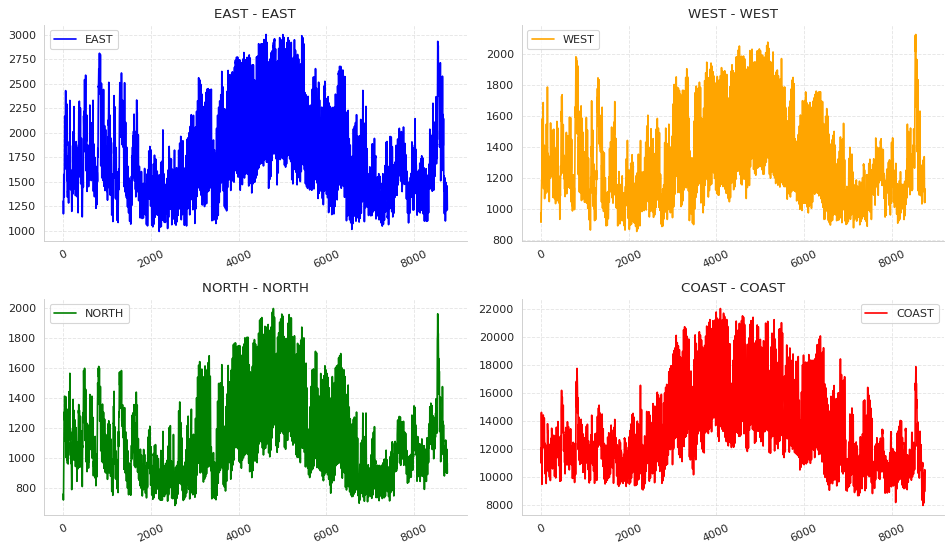

In [15]:
date_time_key = "Date Time"


def show_raw_visualization(df):
    data=df.copy()
    time_data = df.index
    fig, axes = plt.subplots(
        nrows=2, ncols=2, figsize=(12, 7), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
        ax.grid(linestyle='--',alpha=0.5)
    plt.tight_layout()

show_raw_visualization(df)

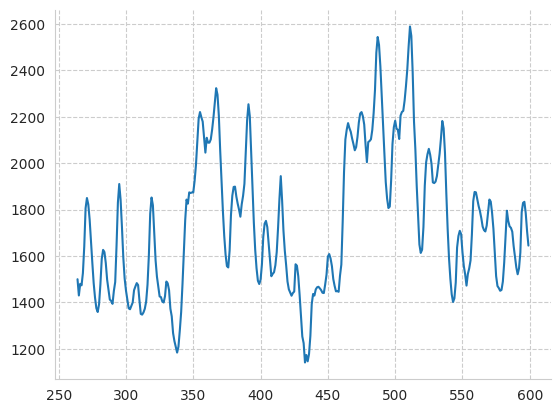

In [16]:
plt.plot(df.EAST[264:264+24*14])

### 3.1 Split the data

You'll use a `(70%, 20%, 10%)` split for the training, validation, and test sets. Note the data is **not** being randomly shuffled before splitting. This is for two reasons:

1. It ensures that chopping the data into windows of consecutive samples is still possible.
2. It ensures that the validation/test results are more realistic, being evaluated on the data collected after the model was trained.

In [17]:
df.tail()

,EAST,WEST,NORTH,COAST
8755,1407.683729,1125.338906,938.901362,10247.562908
8756,1362.637978,1103.919231,963.913723,9887.676773
8757,1327.298817,1084.122587,949.798259,9572.382483
8758,1237.913479,1058.601615,928.929373,9258.586996
8759,1216.122804,1043.484788,898.505355,8999.616362


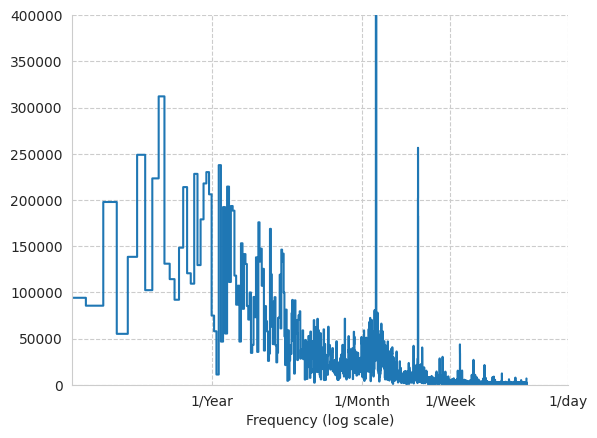

In [18]:
fft = tf.signal.rfft(df['EAST'], )
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['EAST'])
days_per_year = 365.2524
years_per_dataset = n_samples_h/(days_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 12.0, 52, 365.2524], labels=['1/Year', '1/Month', '1/Week','1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [19]:
timestamp_s = np.arange(len(df))

In [20]:
day = 1
year = (365.2425)*day
month = (30.437)*day

df['Month_sin'] = np.sin(timestamp_s * (2 * np.pi / month))
df['Month_cos'] = np.cos(timestamp_s * (2 * np.pi / month))

In [21]:
df.shape

(8760, 6)

In [22]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [23]:
print(f"Train shape: {train_df.shape}\nValid shape: {val_df.shape}\nTest shape: {test_df.shape}")

Train shape: (6132, 6)
Valid shape: (1752, 6)
Test shape: (876, 6)


### Normalize the data

It is important to scale features before training a neural network. Normalization is a common way of doing this scaling: subtract the mean and divide by the standard deviation of each feature.

The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.

It's also arguable that the model shouldn't have access to future values in the training set when training, and that this normalization should be done using moving averages. That's not the focus of this tutorial, and the validation and test sets ensure that you get (somewhat) honest metrics. So, in the interest of simplicity this tutorial uses a simple average.

In [24]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

Now, peek at the distribution of the features. Some features do have long tails, but there are no obvious errors like the `-9999` wind velocity value.

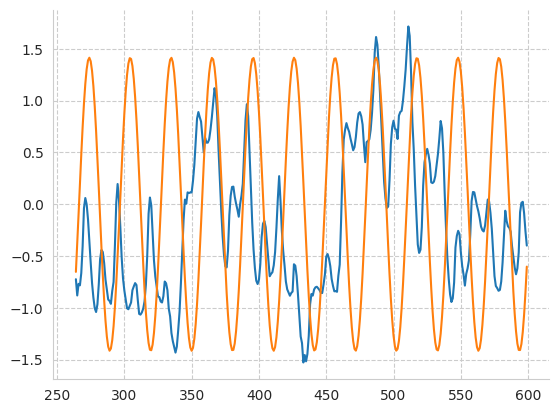

In [25]:
plt.plot(train_df.EAST[264:264+24*14])
plt.plot(train_df.Month_cos[264:264+24*14])

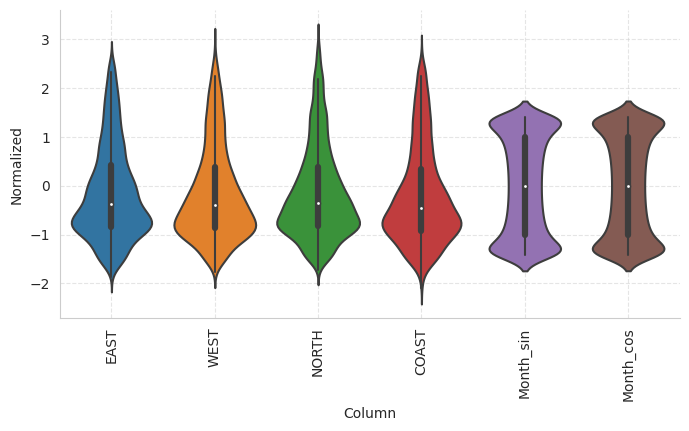

In [26]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(8, 4))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
ax.grid(linestyle='--', alpha=0.5)
_ = ax.set_xticklabels(df.keys(), rotation=90)

* **Correlation Analysis**

In [27]:
train_df.corr()

,EAST,WEST,NORTH,COAST,Month_sin,Month_cos
EAST,1.000000,0.949152,0.944122,0.874554,-0.022552,0.001094
WEST,0.949152,1.000000,0.951467,0.856760,-0.015663,0.009290
NORTH,0.944122,0.951467,1.000000,0.822997,-0.022609,-0.007673
COAST,0.874554,0.856760,0.822997,1.000000,-0.013561,-0.001845
Month_sin,-0.022552,-0.015663,-0.022609,-0.013561,1.000000,0.000070
Month_cos,0.001094,0.009290,-0.007673,-0.001845,0.000070,1.000000


## 4.0 Data windowing

The models in this tutorial will make a set of predictions based on a window of consecutive samples from the data.

The main features of the input windows are:

- The width (number of time steps) of the input and label windows.
- The time offset between them.
- Which features are used as inputs, labels, or both.

This tutorial builds a variety of models (including Linear, DNN, CNN and RNN models), and uses them for both:

- *Single-output*, and *multi-output* predictions.
- *Single-time-step* and *multi-time-step* predictions.

This section focuses on implementing the data windowing so that it can be reused for all of those models.


Depending on the task and type of model you may want to generate a variety of data windows. Here are some examples:

1. For example, to make a single prediction 24 hours into the future, given 48 hours of history, you might define a window like this:

  [One prediction 24 hours into the future.](https://drive.google.com/file/d/16Z0Bvjr6-ugxZaFjVZlh759IlDT1-Nuy/view?usp=sharing)

2. A model that makes a prediction one hour into the future, given six hours of history, would need a window like this:

  [One prediction one hour into the future.](https://github.com/fabriziobasso/Closet_Index_Tracking/blob/master/images/raw_window_1h.png?raw=1)

The rest of this section defines a `WindowGenerator` class. This class can:

1. Handle the indexes and offsets as shown in the diagrams above.
1. Split windows of features into `(features, labels)` pairs.
2. Plot the content of the resulting windows.
3. Efficiently generate batches of these windows from the training, evaluation, and test data, using `tf.data.Dataset`s.

### 1. Indexes and offsets

Start by creating the `WindowGenerator` class. The `__init__` method includes all the necessary logic for the input and label indices.

It also takes the training, evaluation, and test DataFrames as input. These will be converted to `tf.data.Dataset`s of windows later.

In [28]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])


Here is code to create the 2 windows shown in the diagrams at the start of this section:

In [29]:
data_gen = WindowGenerator(input_width=48, label_width=24, shift=24,
                     label_columns=["EAST",	"WEST",	"NORTH",	"COAST"])
data_gen

Total window size: 72
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label indices: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
Label column name(s): ['EAST', 'WEST', 'NORTH', 'COAST']

### 2. Split

Given a list of consecutive inputs, the `split_window` method will convert them to a window of inputs and a window of labels.

The example `w2` you define earlier will be split like this:

[The initial window is all consecutive samples, this splits it into an (inputs, labels) pairs](https://github.com/fabriziobasso/Closet_Index_Tracking/blob/master/images/split_window.png?raw=1)

This diagram doesn't show the `features` axis of the data, but this `split_window` function also handles the `label_columns` so it can be used for both the single output and multi-output examples.

In [30]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [31]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:data_gen.total_window_size]),
                           np.array(train_df[100:100+data_gen.total_window_size]),
                           np.array(train_df[200:200+data_gen.total_window_size])])

example_inputs, example_labels = data_gen.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 72, 6)
Inputs shape: (3, 48, 6)
Labels shape: (3, 24, 4)


In [32]:
train_df.shape

(6132, 6)

### 3. Plot

Here is a plot method that allows a simple visualization of the split window:

In [33]:
data_gen.example = example_inputs, example_labels

In [34]:
def plot(self, model=None, plot_col='NORTH', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    plt.grid(linestyle='--', alpha=0.5)

    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [D]')

WindowGenerator.plot = plot

This plot aligns inputs, labels, and (later) predictions based on the time that the item refers to:

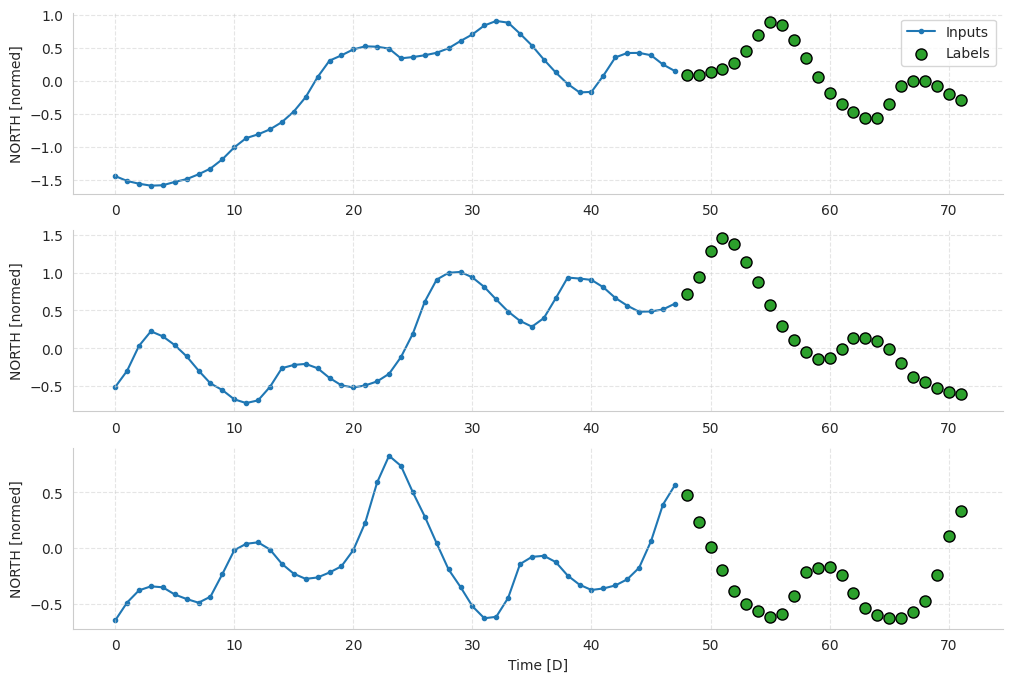

In [35]:
data_gen.plot(max_subplots=5)

You can plot the other columns, but the example window `w2` configuration only has labels for the `T (degC)` column.

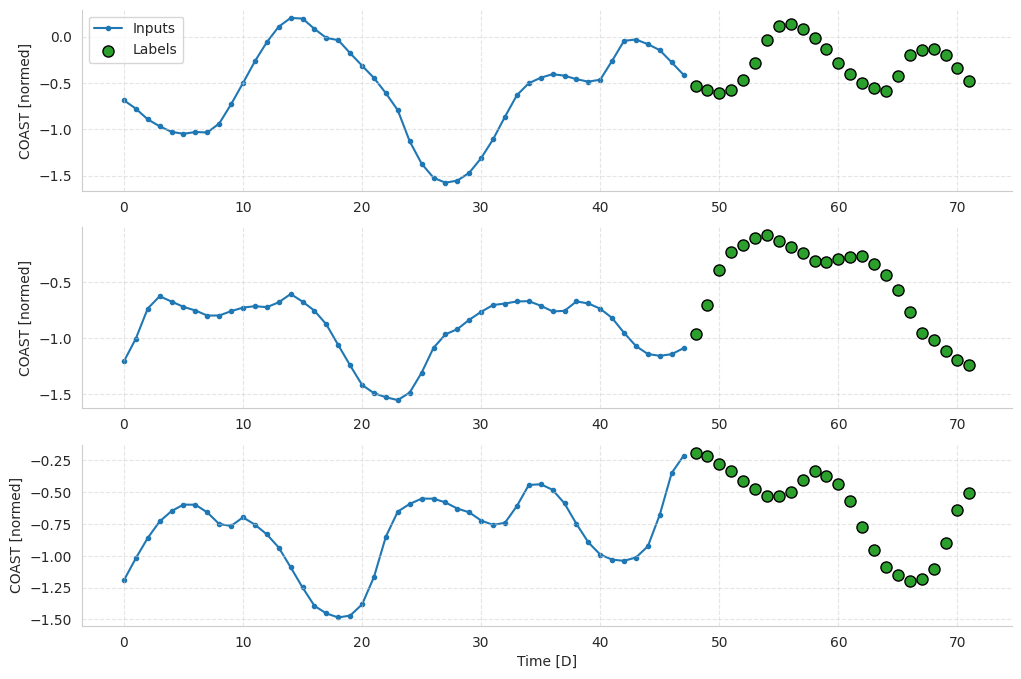

In [36]:
data_gen.plot(plot_col='COAST')

### 4. Create `tf.data.Dataset`s

Finally, this `make_dataset` method will take a time series DataFrame and convert it to a `tf.data.Dataset` of `(input_window, label_window)` pairs using the `tf.keras.utils.timeseries_dataset_from_array` function:

In [37]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

The `WindowGenerator` object holds training, validation, and test data.

Add properties for accessing them as `tf.data.Dataset`s using the `make_dataset` method you defined earlier. Also, add a standard example batch for easy access and plotting:

In [38]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

Now, the `WindowGenerator` object gives you access to the `tf.data.Dataset` objects, so you can easily iterate over the data.

The `Dataset.element_spec` property tells you the structure, data types, and shapes of the dataset elements.

In [39]:
# Each element is an (inputs, label) pair.
data_gen.train.element_spec

(TensorSpec(shape=(None, 48, 6), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 24, 4), dtype=tf.float32, name=None))

Iterating over a `Dataset` yields concrete batches:

In [40]:
for example_inputs, example_labels in data_gen.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 48, 6)
Labels shape (batch, time, features): (32, 24, 4)


In [41]:
a,b = data_gen.example

print(f'Inputs shape (batch, time, features): {a.shape}')
print(f'Labels shape (batch, time, features): {b.shape}')

Inputs shape (batch, time, features): (32, 48, 6)
Labels shape (batch, time, features): (32, 24, 4)


## 5.0 Model

### 5.1 Baseline Model:
Since this task is to predict 24 hours into the future, given 24 hours of the past, another simple approach is to repeat the previous day, assuming tomorrow will be similar:

[Repeat the previous day](images/multistep_repeat.png)

26/26 [==============================] - 0s 2ms/step - loss: 0.2980 - mean_absolute_error: 0.3614 - rmse_score: 0.5459


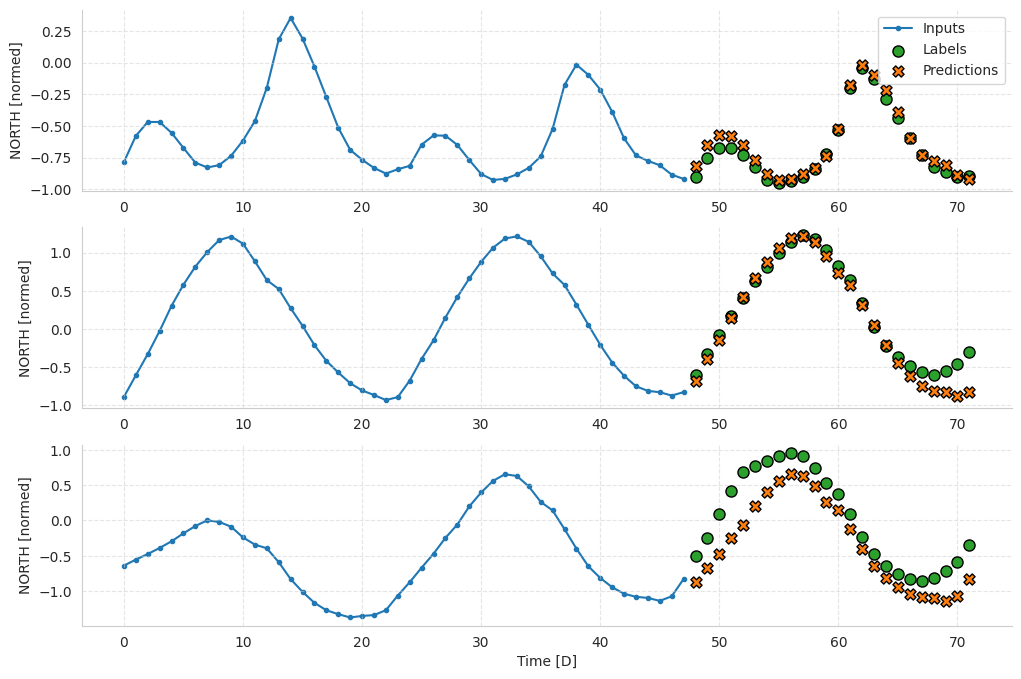

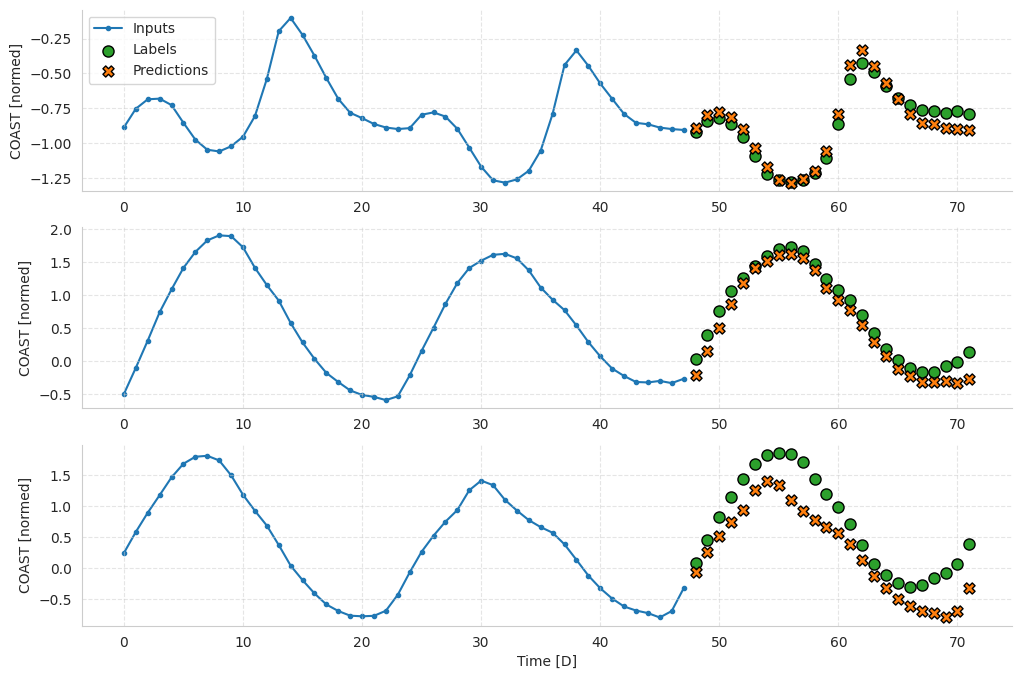

In [42]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs[:,-24:,:4]

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                        metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
                                 tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
                                 ])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Repeat'] = repeat_baseline.evaluate(data_gen.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(data_gen.test)

data_gen.plot(repeat_baseline, plot_col='NORTH')
data_gen.plot(repeat_baseline, plot_col='COAST')

### 5.2 Simple LSTM:

A Recurrent Neural Network (RNN) is a type of neural network well-suited to time series data. RNNs process a time series step-by-step, maintaining an internal state from time-step to time-step.

You can learn more in the [Text generation with an RNN](https://www.tensorflow.org/text/tutorials/text_generation) tutorial and the [Recurrent Neural Networks (RNN) with Keras](https://www.tensorflow.org/guide/keras/rnn) guide.

First Long Short-Term Memory layers(`tf.keras.layers.LSTM`) are used:

In [43]:
def lstm_model(units_=512, l1=0.001, lr_=0.00025):

  inputs = tf.keras.Input(shape=(48,6))

  x = tf.keras.layers.LSTM(units=units_,
                           kernel_regularizer=tf.keras.regularizers.L1(l1=l1),
                           return_sequences=False,
                           name="LSTM_0")(inputs)

  output = tf.keras.layers.Dense(4*24, name="Dense_0")(x)

  output = tf.keras.layers.Reshape([24, 4])(output)

  model = tf.keras.Model(inputs, output)

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
                         tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
                         ])

  return model



In [44]:
model_lstm_v1 = lstm_model()
model_lstm_v1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 6)]           0         
                                                                 
 LSTM_0 (LSTM)               (None, 512)               1062912   
                                                                 
 Dense_0 (Dense)             (None, 96)                49248     
                                                                 
 reshape (Reshape)           (None, 24, 4)             0         
                                                                 
Total params: 1,112,160
Trainable params: 1,112,160
Non-trainable params: 0
_________________________________________________________________


In [45]:
print('Input shape:', data_gen.example[0].shape)
print('Labels shape:', data_gen.example[1].shape)
print('Output shape:', model_lstm_v1(data_gen.example[0]).shape)

Input shape: (32, 48, 6)
Labels shape: (32, 24, 4)
Output shape: (32, 24, 4)


In [46]:
# Compile the Callbacks:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_mean_absolute_error",
                                          factor=0.5,
                                          patience=5,
                                          verbose=1,
                                          mode="min")

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_mean_absolute_error",
                                              patience=12,
                                              verbose=1,
                                              mode="min",
                                              restore_best_weights=True)

checkpoint_filepath = folders_nn + 'checkpoint/'
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                save_weights_only=True,
                                                monitor="val_mean_absolute_error",
                                                mode='min',
                                                restore_best_weights=True)

#history = model_lstm_v1.fit(data_gen.train, epochs=100,
#                            validation_data=data_gen.val,
#                            callbacks=[red_lr,early_stop,Checkpoint])

26/26 [==============================] - 0s 6ms/step - loss: 0.3687 - mean_absolute_error: 0.4392 - rmse_score: 0.5978


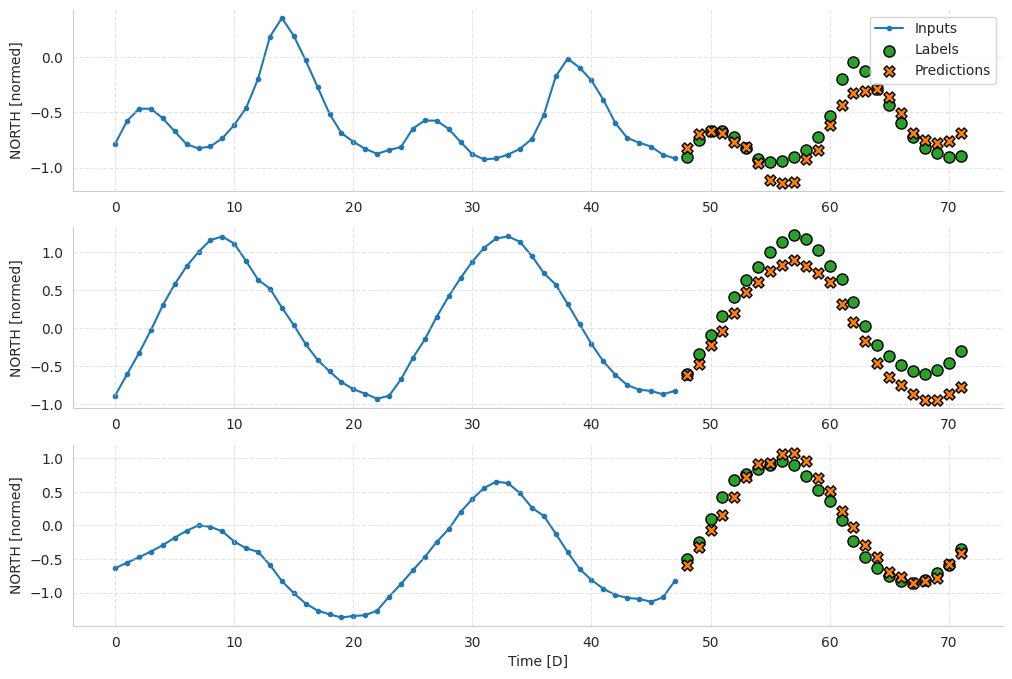

In [47]:
#model_lstm_v1.save(folders_nn+f'lstm_v1')
model_lstm_v1 = tf.keras.models.load_model(folders_nn+f'lstm_v1')

multi_val_performance['LSTM_v1'] = model_lstm_v1.evaluate(data_gen.val)
multi_performance['LSTM'] = model_lstm_v1.evaluate(data_gen.test)
data_gen.plot(model_lstm_v1)

In [48]:
multi_val_performance

{'Repeat': [0.08807235956192017, 0.21613632142543793, 0.2967698276042938],
 'LSTM_v1': [0.09903813898563385, 0.22314530611038208, 0.2961405813694]}

#### 5.2.1 Model Tuner:

In [49]:
# Define the hyperparameter search space: EXPERIMENT 0
hp = kt.HyperParameters()
hp.Choice('units_', values=[128,256,512])#
hp.Choice('l1_reg', values=[0.0001,0.001,0.01]);

In [50]:
# TRAIN MODEL
# Define Preprocessing steps:

def create_turner_model(hp):

  model = lstm_model(units_=hp.get('units_'), l1=hp.get('l1_reg'))

  return model

In [51]:
# Create a tuner and search for the best hyperparameters
#tuner = GridSearch(create_turner_model, objective=kt.Objective("val_mean_absolute_error",direction="min"), hyperparameters=hp, overwrite=True)
#tuner.search(data_gen.train, validation_data=data_gen.val, epochs=35)

128 0.001

In [52]:
#tuner.get_best_hyperparameters()[0].values

### 5.3 Stacked LSTM:

A Recurrent Neural Network (RNN) is a type of neural network well-suited to time series data. RNNs process a time series step-by-step, maintaining an internal state from time-step to time-step.

You can learn more in the [Text generation with an RNN](https://www.tensorflow.org/text/tutorials/text_generation) tutorial and the [Recurrent Neural Networks (RNN) with Keras](https://www.tensorflow.org/guide/keras/rnn) guide.

First Long Short-Term Memory layers(`tf.keras.layers.LSTM`) are used:

In [53]:
def lstm_model_stacked(units_=[256,64], l1=0.001, lr_=0.00025):

  inputs = tf.keras.Input(shape=(48,6))

  x = tf.keras.layers.LSTM(units=units_[0],
                           kernel_regularizer=tf.keras.regularizers.L1(l1=l1),
                           return_sequences=True,
                           name="LSTM_0")(inputs)

  x = tf.keras.layers.LSTM(units=units_[1],
                           kernel_regularizer=tf.keras.regularizers.L1(l1=l1),
                           return_sequences=False,
                           name="LSTM_1")(x)

  output = tf.keras.layers.Dense(4*24, name="Dense_0")(x)

  output = tf.keras.layers.Reshape([24, 4])(output)

  model = tf.keras.Model(inputs, output)

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
                         tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
                         ])

  return model

In [54]:
model_lstm_v2 = lstm_model_stacked()
model_lstm_v2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 6)]           0         
                                                                 
 LSTM_0 (LSTM)               (None, 48, 256)           269312    
                                                                 
 LSTM_1 (LSTM)               (None, 64)                82176     
                                                                 
 Dense_0 (Dense)             (None, 96)                6240      
                                                                 
 reshape_1 (Reshape)         (None, 24, 4)             0         
                                                                 
Total params: 357,728
Trainable params: 357,728
Non-trainable params: 0
_________________________________________________________________


In [55]:
print('Input shape:', data_gen.example[0].shape)
print('Labels shape:', data_gen.example[1].shape)
print('Output shape:', model_lstm_v2(data_gen.example[0]).shape)

Input shape: (32, 48, 6)
Labels shape: (32, 24, 4)
Output shape: (32, 24, 4)


In [56]:
# Compile the Callbacks:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_mean_absolute_error",
                                          factor=0.5,
                                          patience=5,
                                          verbose=1,
                                          mode="min")

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_mean_absolute_error",
                                              patience=12,
                                              verbose=1,
                                              mode="min",
                                              restore_best_weights=True)

checkpoint_filepath = folders_nn + 'checkpoint/'
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                save_weights_only=True,
                                                monitor="val_mean_absolute_error",
                                                mode='min',
                                                restore_best_weights=True)

#history = model_lstm_v2.fit(data_gen.train, epochs=100,
#                            validation_data=data_gen.val,
#                            callbacks=[red_lr,early_stop,Checkpoint])

In [57]:
#model_lstm_v2.save(folders_nn+f'lstm_staked_v1')
model_lstm_v2 = tf.keras.models.load_model(folders_nn+f'lstm_staked_v1')

#multi_val_performance['LSTM_stacked_v1'] = model_lstm_v2.evaluate(data_gen.val)
#multi_performance['LSTM_stacked_v1'] = model_lstm_v2.evaluate(data_gen.test)
#data_gen.plot(model_lstm_v2)

### **5.4 CNN v0**

In [58]:
def cnn_model(conv_width=256, ks = 3, lr_=0.001):

  inputs = tf.keras.Input(shape=(48,6))
  #x = tf.keras.layers.Lambda(lambda x: x[:, -ks:, :])(inputs)
  x = tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(ks))(inputs)
  # x = tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(ks))(x)
  # Shape => [batch, 1,  out_steps*features]
  x = tf.keras.layers.Flatten()(x)
  output = tf.keras.layers.Dense(24*4)(x)
  # Shape => [batch, out_steps, features]
  output = tf.keras.layers.Reshape([24, 4])(output)

  model = tf.keras.Model(inputs, output)

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
                         tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
                         ])

  return model

In [59]:
model_cnn_v0 = cnn_model()
model_cnn_v0.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 6)]           0         
                                                                 
 conv1d (Conv1D)             (None, 46, 256)           4864      
                                                                 
 flatten (Flatten)           (None, 11776)             0         
                                                                 
 dense (Dense)               (None, 96)                1130592   
                                                                 
 reshape_2 (Reshape)         (None, 24, 4)             0         
                                                                 
Total params: 1,135,456
Trainable params: 1,135,456
Non-trainable params: 0
_________________________________________________________________


In [60]:
print('Input shape:', data_gen.example[0].shape)
print('Labels shape:', data_gen.example[1].shape)
print('Output shape:', model_cnn_v0(data_gen.example[0]).shape)

Input shape: (32, 48, 6)
Labels shape: (32, 24, 4)
Output shape: (32, 24, 4)


In [61]:
# Compile the Callbacks:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_mean_absolute_error",
                                          factor=0.5,
                                          patience=5,
                                          verbose=1,
                                          mode="min")

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_mean_absolute_error",
                                              patience=12,
                                              verbose=1,
                                              mode="min",
                                              restore_best_weights=True)

checkpoint_filepath = folders_nn + 'checkpoint/'
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                save_weights_only=True,
                                                monitor="val_mean_absolute_error",
                                                mode='min',
                                                restore_best_weights=True)


model_cnn_v0 = tf.keras.models.load_model(folders_nn+f'cnn_v1')

#history = model_cnn_v0.fit(data_gen.train, epochs=100,
#                            validation_data=data_gen.val,
#                            callbacks=[red_lr,early_stop,Checkpoint])

26/26 [==============================] - 0s 4ms/step - loss: 0.2151 - mean_absolute_error: 0.3283 - rmse_score: 0.4638


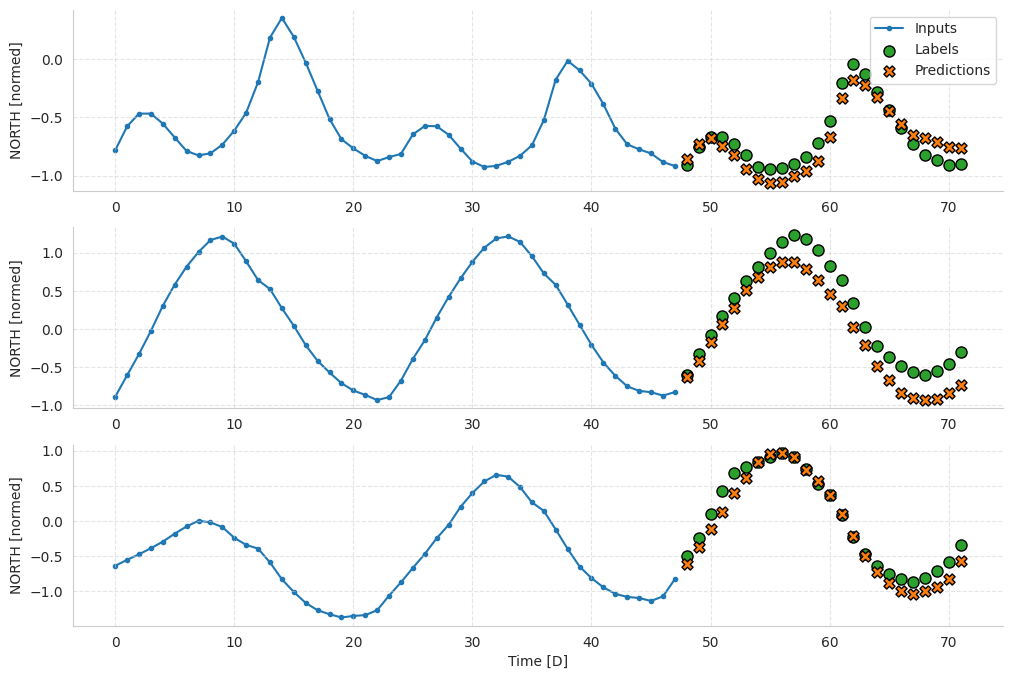

In [62]:
#model_cnn_v0.save(folders_nn+f'cnn_v1')
model_cnn_v0 = tf.keras.models.load_model(folders_nn+f'cnn_v1')

multi_val_performance['CNN_v0'] = model_cnn_v0.evaluate(data_gen.val)
multi_performance['CNN_v0'] = model_cnn_v0.evaluate(data_gen.test)
data_gen.plot(model_cnn_v0)

In [63]:
multi_performance

{'Repeat': [0.29796865582466125, 0.36136215925216675, 0.5458650588989258],
 'LSTM': [0.3687010705471039, 0.43924644589424133, 0.597797691822052],
 'CNN_v0': [0.21508407592773438, 0.3282665014266968, 0.4637715816497803]}

### **5.5 CNN v1**

In [64]:
def cnn_model_stack(conv_width=None, ks = 3, lr_=0.0005):

  inputs = tf.keras.Input(shape=(48,6))
  x = tf.keras.layers.Conv1D(128, activation='relu', kernel_size=(ks))(inputs)
  x = tf.keras.layers.MaxPooling1D(pool_size=4, strides=1, padding="valid", data_format="channels_last")(x)
#  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(ks))(x)
  # Shape => [batch, 1,  out_steps*features]
#  x = tf.keras.layers.GlobalMaxPooling1D()(x)
#  x = tf.keras.layers.BatchNormalization()(x)

  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.GaussianNoise(0.05, seed=1978)(x)

  x = tf.keras.layers.Dense(256,kernel_initializer="he_normal")(x)
  x = tf.keras.layers.Dropout(0.25)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.PReLU()(x)

  output = tf.keras.layers.Dense(24*4)(x)
  # Shape => [batch, out_steps, features]
  output = tf.keras.layers.Reshape([24, 4])(output)

  model = tf.keras.Model(inputs, output)

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
                         tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
                         ])

  return model

In [65]:
model_cnn_v1 = cnn_model_stack()
model_cnn_v1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 6)]           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 46, 128)           2432      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 43, 128)          0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 256)           98560     
                                                                 
 flatten_1 (Flatten)         (None, 10496)             0         
                                                                 
 gaussian_noise (GaussianNoi  (None, 10496)            0         
 se)                                                       

In [66]:
print('Input shape:', data_gen.example[0].shape)
print('Labels shape:', data_gen.example[1].shape)
print('Output shape:', model_cnn_v1(data_gen.example[0]).shape)

Input shape: (32, 48, 6)
Labels shape: (32, 24, 4)
Output shape: (32, 24, 4)


In [67]:
# Compile the Callbacks:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_mean_absolute_error",
                                          factor=0.5,
                                          patience=5,
                                          verbose=1,
                                          mode="min")

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_mean_absolute_error",
                                              patience=12,
                                              verbose=1,
                                              mode="min",
                                              restore_best_weights=True)

checkpoint_filepath = folders_nn + 'checkpoint/'
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                save_weights_only=True,
                                                monitor="val_mean_absolute_error",
                                                mode='min',
                                                restore_best_weights=True)


#model_cnn_v0 = tf.keras.models.load_model(folders_nn+f'cnn_v1')

#history = model_cnn_v1.fit(data_gen.train, epochs=100,
#                            validation_data=data_gen.val,
#                            callbacks=[red_lr,early_stop,Checkpoint])

26/26 [==============================] - 0s 5ms/step - loss: 0.2636 - mean_absolute_error: 0.3693 - rmse_score: 0.5135


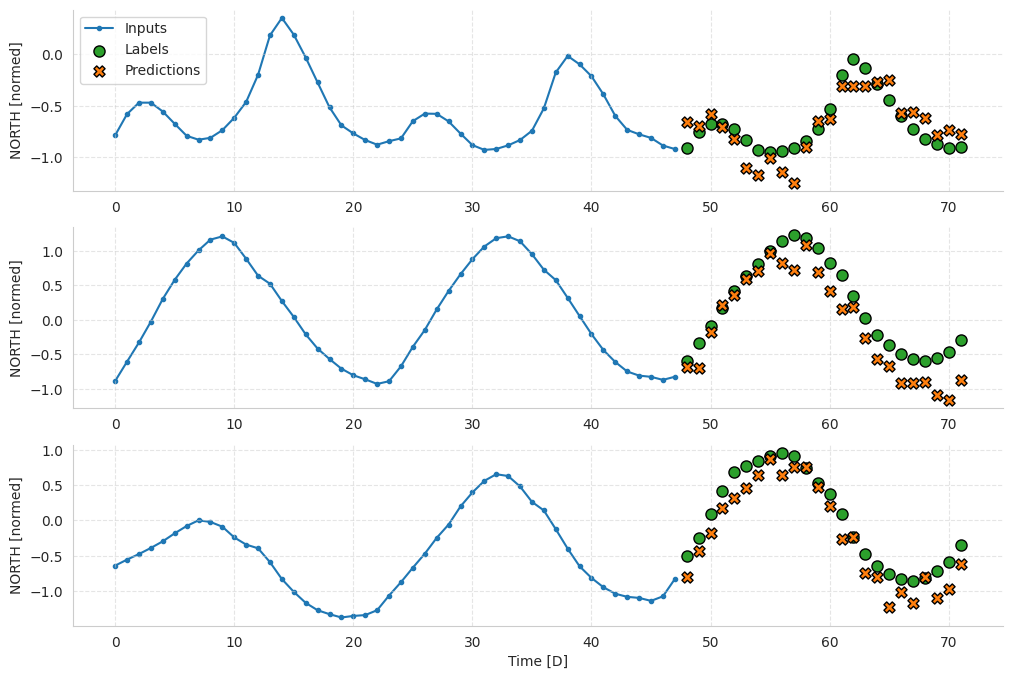

In [68]:
#model_cnn_v1.save(folders_nn+f'cnn_v2')
model_cnn_v1 = tf.keras.models.load_model(folders_nn+f'cnn_v2')

multi_val_performance['CNN_v1'] = model_cnn_v1.evaluate(data_gen.val)
multi_performance['CNN_v1'] = model_cnn_v1.evaluate(data_gen.test)
data_gen.plot(model_cnn_v1)

In [69]:
multi_val_performance

{'Repeat': [0.08807235956192017, 0.21613632142543793, 0.2967698276042938],
 'LSTM_v1': [0.09903813898563385, 0.22314530611038208, 0.2961405813694],
 'CNN_v0': [0.08383399248123169, 0.2141568809747696, 0.28954100608825684],
 'CNN_v1': [0.09807891398668289, 0.24250392615795135, 0.3131755292415619]}

### **5.6 Transformer Models**

[Link](https://github.com/greatwhiz/tft_tf2/blob/master/libs/tft_model.py)

In [70]:
def trans_ts_model(input_shape=(example_inputs.shape[1], example_inputs.shape[2]), att_layers = 2, lr_=0.0005,
                   head_size=6, num_heads=4, filters=32, dropout=0.30, mlp_units=64, lstm_units=32):

  inputs = keras.layers.Input(shape=input_shape)

  x = inputs

  x = tf.keras.layers.GaussianNoise(0.025, seed=1978)(x)

  for _ in range(att_layers):
    x = keras.layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = keras.layers.Dropout(dropout)(x)
    x = keras.layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=filters, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=example_inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)


  x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)

  lstm_out = keras.layers.LSTM(lstm_units)(inputs)

  x = tf.keras.layers.Concatenate()([x,lstm_out])

  #x = tf.keras.layers.GaussianNoise(0.025, seed=1978)(x)

  x = layers.Dense(mlp_units, activation="relu")(x)
  x = layers.Dropout(dropout)(x)

  output = tf.keras.layers.Dense(24*4)(x)
  # Shape => [batch, out_steps, features]
  output = tf.keras.layers.Reshape([24, 4])(output)

  model_attention = keras.Model(inputs=inputs, outputs=output)

  model_attention.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
                        tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
                        ])

  return model_attention

In [71]:
model_attention = trans_ts_model()
model_attention.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 48, 6)]      0           []                               
                                                                                                  
 gaussian_noise_1 (GaussianNois  (None, 48, 6)       0           ['input_5[0][0]']                
 e)                                                                                               
                                                                                                  
 multi_head_attention (MultiHea  (None, 48, 6)       654         ['gaussian_noise_1[0][0]',       
 dAttention)                                                      'gaussian_noise_1[0][0]']       
                                                                                            

#### 5.6.1 Keras Tuner:

In [72]:
# Define the hyperparameter search space: EXPERIMENT 0
hp = kt.HyperParameters()
hp.Choice('head_size', values=[12,24])#
hp.Choice('att_layers', values=[2,3])
hp.Choice('dropout', values=[0.25, 0.30])
hp.Choice('num_heads', values=[4,6,8])#
hp.Choice('filters', values=[32,64,128])#
hp.Choice('mlp_units', values=[64,128])#
hp.Choice('lstm_units', values=[64,128]);

# Define the hyperparameter search space: EXPERIMENT 3
#hp = kt.HyperParameters()
#hp.Choice('gn_noise', values=[0.05,0.1])
#hp.Choice('dropout', values=[0.30])
#hp.Choice('num_attention', values=[1])
#hp.Choice('n_heads', values=[4])
#hp.Choice('key_dim', values=[10,12])
#hp.Choice('units_0', values=[512,1024])
#hp.Choice('units_1', values=[128,256,512])
#hp.Choice('activation', values=['swish', 'gelu']);

In [73]:
# TRAIN MODEL
# Define Preprocessing steps:

def create_turner_model(hp):

  model = trans_ts_model(att_layers = hp.get('att_layers'),
                         head_size = hp.get('head_size'),
                         num_heads=hp.get('num_heads'),
                         filters=hp.get('filters'),
                         dropout=hp.get('dropout'),
                         mlp_units=hp.get('mlp_units'),
                         lstm_units=hp.get("lstm_units"))

  return model


class trans_model_optim(kt.HyperModel):
  def build(self, hp):
    model = trans_ts_model(att_layers = hp.get('att_layers'),
                          head_size = hp.get('head_size'),
                          num_heads=hp.get('num_heads'),
                          filters=hp.get('filters'),
                          dropout=hp.get('dropout'),
                          mlp_units=hp.get('mlp_units'),
                          lstm_units=hp.get("lstm_units"))
    return model

In [74]:
# Create a tuner and search for the best hyperparameters
#tuner = BayesianOptimization(trans_model_optim(), objective=kt.Objective("val_mean_absolute_error",direction="min"), hyperparameters=hp, max_trials=35, overwrite=True)
#tuner.search(data_gen.train, validation_data=data_gen.val, epochs=20)

In [75]:
print("Best Model:")

#best_hyper = tuner.get_best_hyperparameters()[0].values
#tuner.get_best_hyperparameters()[0].values

Best Model:


In [76]:
print("Runner-up Model:")

#runnerup_hyper = tuner.get_best_hyperparameters(num_trials=2)[1].values
#tuner.get_best_hyperparameters(num_trials=2)[1].values

Runner-up Model:


In [77]:
#tuner.results_summary(num_trials=3)

In [78]:
#best_model = tuner.get_best_models(num_models=2)

#best_model[0].save(folders_nn+f'trans_v1')
#best_model[1].save(folders_nn+f'trans_v2')

#transformer_v1 = tf.keras.models.load_model(folders_nn+f'trans_v1')
#transformer_v2 = tf.keras.models.load_model(folders_nn+f'trans_v2')

#transformer_v1.save_weights(folders_nn+'trans_v1'+'/my_checkpoint_v1/')
#transformer_v2.save_weights(folders_nn+'trans_v2'+'/my_checkpoint_v2/')

In [79]:
#best_hyper = {'head_size': 12,'att_layers': 2,'dropout': 0.25,'num_heads': 6,'filters': 32,'mlp_units': 128,'lstm_units': 64}
#runner_hyper = {'head_size': 12, 'att_layers': 2, 'dropout': 0.25, 'num_heads': 4,'filters': 64,'mlp_units': 64,'lstm_units': 128}

#transformer_v1 = trans_ts_model(input_shape=(example_inputs.shape[1], example_inputs.shape[2]), lr_=0.0001,**best_hyper)

#transformer_v1.summary()

#transformer_v1.load_weights(folders_nn+'trans_v1'+'/my_checkpoint_v1/')

#### 5.6.2 Fit:

In [80]:
seed_everything(SEED)
# Compile the Callbacks:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_mean_absolute_error",
                                          factor=0.5,
                                          patience=5,
                                          verbose=1,
                                          mode="min")

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_mean_absolute_error",
                                              patience=10,
                                              verbose=1,
                                              mode="min",
                                              restore_best_weights=True)

checkpoint_filepath = folders_nn + 'checkpoint/'
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                save_weights_only=True,
                                                monitor="val_mean_absolute_error",
                                                mode='min',
                                                restore_best_weights=True)


#transformer_v1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
#            loss=tf.keras.losses.MeanSquaredError(),
#            metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
#                      tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
#                      ])

#history = transformer_v1.fit(data_gen.train, epochs=100,
#                            validation_data=data_gen.val,
#                            callbacks=[red_lr,early_stop,Checkpoint])

26/26 [==============================] - 0s 7ms/step - loss: 0.2669 - mean_absolute_error: 0.3716 - rmse_score: 0.5166


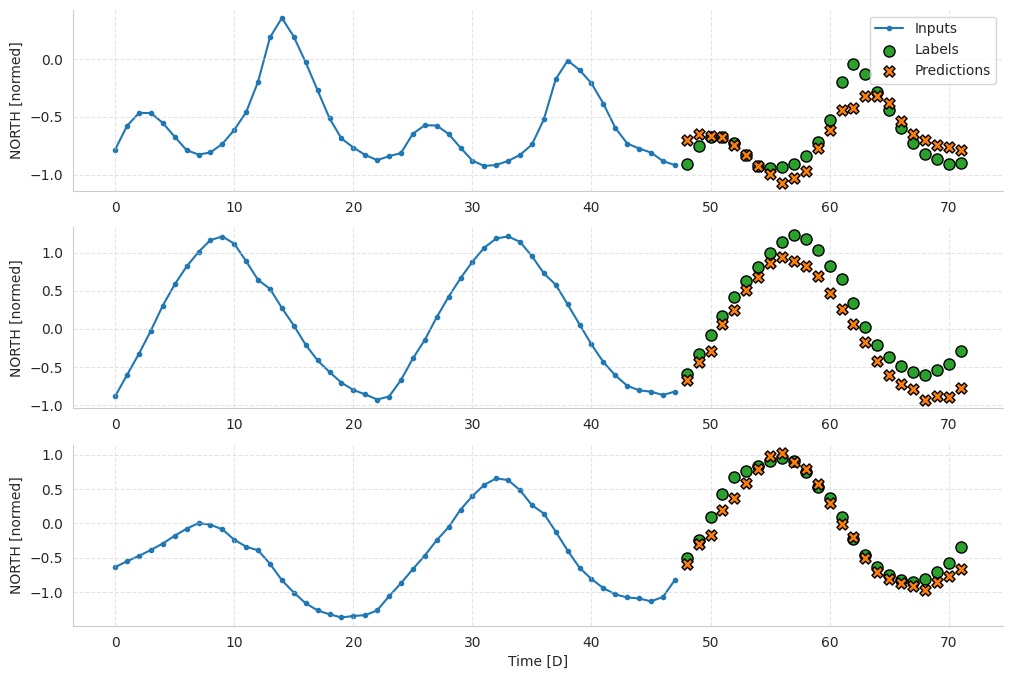

In [81]:
#transformer_v1.save(folders_nn+f'trans_v1')
transformer_v1 = tf.keras.models.load_model(folders_nn+f'trans_v1')

multi_val_performance['trans_v1'] = transformer_v1.evaluate(data_gen.val)
multi_performance['trans_v1'] = transformer_v1.evaluate(data_gen.test)
data_gen.plot(transformer_v1)

In [82]:
multi_performance

{'Repeat': [0.29796865582466125, 0.36136215925216675, 0.5458650588989258],
 'LSTM': [0.3687010705471039, 0.43924644589424133, 0.597797691822052],
 'CNN_v0': [0.21508407592773438, 0.3282665014266968, 0.4637715816497803],
 'CNN_v1': [0.2636370360851288, 0.36930766701698303, 0.5134559869766235],
 'trans_v1': [0.26692530512809753, 0.37159082293510437, 0.5166481137275696]}

In [83]:
multi_val_performance

{'Repeat': [0.08807235956192017, 0.21613632142543793, 0.2967698276042938],
 'LSTM_v1': [0.09903813898563385, 0.22314530611038208, 0.2961405813694],
 'CNN_v0': [0.08383399248123169, 0.2141568809747696, 0.28954100608825684],
 'CNN_v1': [0.09807891398668289, 0.24250392615795135, 0.3131755292415619],
 'trans_v1': [0.0790049210190773, 0.21647338569164276, 0.28107815980911255]}

### **5.7 Encoder-Decoder Model v0**

In [84]:

# Define the modified Seq2Seq model with slicing inside the model
def seq2seq_attention_model(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4,
                            lstm_units=64):
    # Encoder input with all input features
    encoder_inputs = tf.keras.layers.Input(shape=(input_sequence_length, num_features))

    # Encoder LSTM layer
    encoder_outputs, state_h, state_c = tf.keras.layers.LSTM(units=lstm_units, return_sequences=True, return_state=True)(encoder_inputs)

    # Discard the encoder outputs and only keep the states
    encoder_states = [state_h, state_c]

    # Slice the forecast features from the input sequence
    forecast_features = tf.keras.layers.Lambda(lambda x: x[:, -forecast_horizon:, :num_forecast_features])(encoder_inputs)

    # Decoder input with the subset of forecast features
    decoder_inputs = forecast_features

    # Initialize the decoder LSTM with encoder_states and decoder_inputs
    decoder_outputs, _, _ = tf.keras.layers.LSTM(units=lstm_units, return_sequences=True, return_state=True)(decoder_inputs, initial_state=encoder_states)

    # Apply attention
    attention_output = tf.keras.layers.Attention()([decoder_outputs, encoder_outputs])

    # Element-wise multiplication of attention output and decoder LSTM output
    decoder_combined_context = tf.multiply(attention_output, decoder_outputs)


    #decoder_combined_context = tf.keras.layers.Concatenate(axis=-1)([decoder_outputs, attention_output])

    # Final dense layer for prediction, with num_forecast_features units
    decoder_outputs = tf.keras.layers.Dense(num_forecast_features)(decoder_combined_context)

    #output = tf.keras.layers.Reshape([24, 4])(decoder_outputs)

    # Create the model
    model_attention = keras.Model(inputs=encoder_inputs, outputs=decoder_outputs)

    model_attention.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00025),
                           loss=tf.keras.losses.MeanSquaredError(),
                           metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
                                    tf.keras.metrics.RootMeanSquaredError(name='rmse_score')])

    return model_attention

In [85]:
enc_dec_model = seq2seq_attention_model()
enc_dec_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 48, 6)]      0           []                               
                                                                                                  
 lambda (Lambda)                (None, 24, 4)        0           ['input_6[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  [(None, 48, 64),     18176       ['input_6[0][0]']                
                                 (None, 64),                                                      
                                 (None, 64)]                                                      
                                                                                            

In [86]:
print('Input shape:', data_gen.example[0].shape)
print('Labels shape:', data_gen.example[1].shape)
print('Output shape:', enc_dec_model(data_gen.example[0]).shape)

Input shape: (32, 48, 6)
Labels shape: (32, 24, 4)
Output shape: (32, 24, 4)


#### 5.7.1 Keras Tuner:

In [87]:
# Define the hyperparameter search space: EXPERIMENT 0 seq2seq_attention_model(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4,lstm_units=64):
hp = kt.HyperParameters()
hp.Choice('lstm_units', values=[32,64,128,256]);

# Define the hyperparameter search space: EXPERIMENT 3
#hp = kt.HyperParameters()
#hp.Choice('gn_noise', values=[0.05,0.1])
#hp.Choice('dropout', values=[0.30])
#hp.Choice('num_attention', values=[1])
#hp.Choice('n_heads', values=[4])
#hp.Choice('key_dim', values=[10,12])
#hp.Choice('units_0', values=[512,1024])
#hp.Choice('units_1', values=[128,256,512])
#hp.Choice('activation', values=['swish', 'gelu']);

In [88]:
# TRAIN MODEL seq2seq_attention_model(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4)
# Define Preprocessing steps:

class end_dec_model_optim(kt.HyperModel):
  def build(self, hp):

    model = seq2seq_attention_model(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4,lstm_units=hp.get("lstm_units"))

    return model

In [89]:
# Create a tuner and search for the best hyperparameters
tuner = GridSearch(end_dec_model_optim(), objective=kt.Objective("val_mean_absolute_error",direction="min"), hyperparameters=hp, overwrite=True)
#tuner.search(data_gen.train, validation_data=data_gen.val, epochs=25)

In [90]:
print("Best Model:")

#best_hyper = tuner.get_best_hyperparameters()[0].values
#tuner.get_best_hyperparameters()[0].values

Best Model:


In [91]:
print("Runner-up Model:")

#runnerup_hyper = tuner.get_best_hyperparameters(num_trials=2)[1].values
#tuner.get_best_hyperparameters(num_trials=2)[1].values

Runner-up Model:


In [92]:
#tuner.results_summary(num_trials=4)

In [93]:
#best_model = tuner.get_best_models(num_models=2)

#best_model[0].save(folders_nn+f'encdec_v1')
#best_model[1].save(folders_nn+f'encdec_v2')

#encdec_v1 = tf.keras.models.load_model(folders_nn+f'encdec_v1')
#encdec_v2 = tf.keras.models.load_model(folders_nn+f'encdec_v2')

#encdec_v1.save_weights(folders_nn+'encdec_v1'+'/my_checkpoint_v1/')
#encdec_v2.save_weights(folders_nn+'encdec_v2'+'/my_checkpoint_v2/')

In [94]:
best_hyper = {'lstm_units': 256}
runner_hyper = {'lstm_units': 128}

encdec_v1 = seq2seq_attention_model(**best_hyper)

encdec_v1.summary()

encdec_v1.load_weights(folders_nn+'encdec_v1'+'/my_checkpoint_v1/')

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 48, 6)]      0           []                               
                                                                                                  
 lambda_2 (Lambda)              (None, 24, 4)        0           ['input_8[0][0]']                
                                                                                                  
 lstm_5 (LSTM)                  [(None, 48, 256),    269312      ['input_8[0][0]']                
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                            

#### 5.7.2 Fit:

In [95]:
seed_everything(SEED)
# Compile the Callbacks:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_mean_absolute_error",
                                          factor=0.5,
                                          patience=5,
                                          verbose=1,
                                          mode="min")

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_mean_absolute_error",
                                              patience=10,
                                              verbose=1,
                                              mode="min",
                                              restore_best_weights=True)

checkpoint_filepath = folders_nn + 'checkpoint/'
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                save_weights_only=True,
                                                monitor="val_mean_absolute_error",
                                                mode='min',
                                                restore_best_weights=True)


encdec_v1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00001),
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
                            tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
                            ])

#history = encdec_v1.fit(data_gen.train, epochs=100,
#                            validation_data=data_gen.val,
#                            callbacks=[red_lr,early_stop,Checkpoint])

26/26 [==============================] - 0s 5ms/step - loss: 0.2757 - mean_absolute_error: 0.3772 - rmse_score: 0.5251


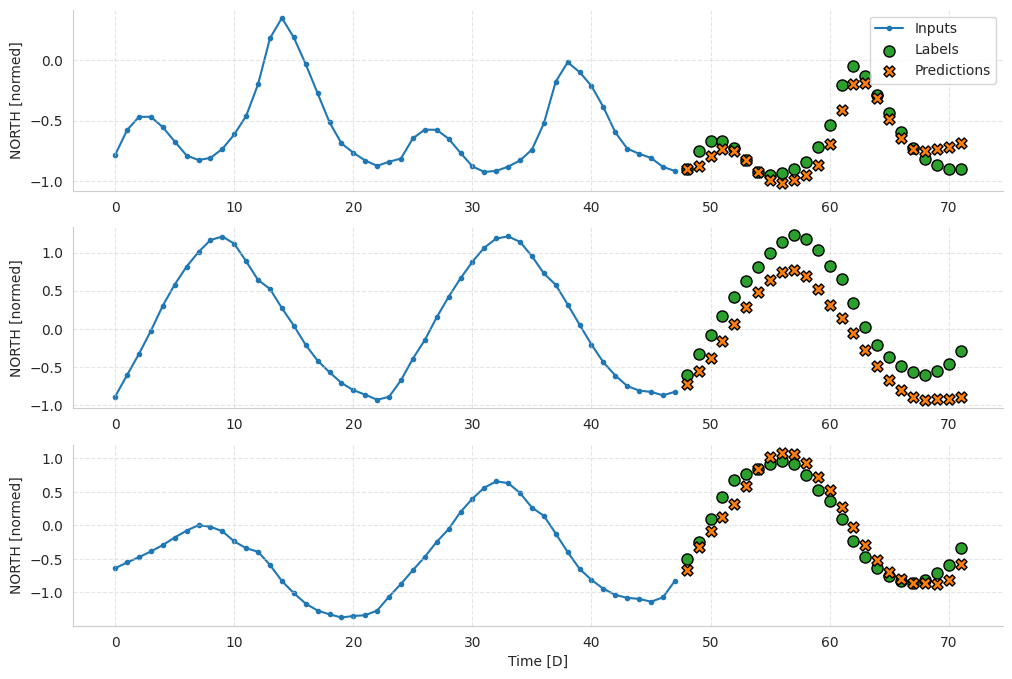

In [96]:
#transformer_v1.save(folders_nn+f'trans_v1')
#encdec_v1 = tf.keras.models.load_model(folders_nn+f'encdec_v1')

multi_val_performance['encdec_v1'] = encdec_v1.evaluate(data_gen.val)
multi_performance['encdec_v1'] = encdec_v1.evaluate(data_gen.test)
data_gen.plot(encdec_v1)

In [97]:
multi_performance

{'Repeat': [0.29796865582466125, 0.36136215925216675, 0.5458650588989258],
 'LSTM': [0.3687010705471039, 0.43924644589424133, 0.597797691822052],
 'CNN_v0': [0.21508407592773438, 0.3282665014266968, 0.4637715816497803],
 'CNN_v1': [0.2636370360851288, 0.36930766701698303, 0.5134559869766235],
 'trans_v1': [0.26692530512809753, 0.37159082293510437, 0.5166481137275696],
 'encdec_v1': [0.2757013440132141, 0.37721380591392517, 0.5250727534294128]}

In [98]:
multi_val_performance

{'Repeat': [0.08807235956192017, 0.21613632142543793, 0.2967698276042938],
 'LSTM_v1': [0.09903813898563385, 0.22314530611038208, 0.2961405813694],
 'CNN_v0': [0.08383399248123169, 0.2141568809747696, 0.28954100608825684],
 'CNN_v1': [0.09807891398668289, 0.24250392615795135, 0.3131755292415619],
 'trans_v1': [0.0790049210190773, 0.21647338569164276, 0.28107815980911255],
 'encdec_v1': [0.07736872136592865, 0.20768126845359802, 0.27815237641334534]}

### **5.8 Encoder-Decoder Model v1**

In [99]:
# Define the modified Seq2Seq model with slicing inside the model
def seq2seq_attention_model_v1(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4,
                            lstm_units=256, res_units=[256,256], res_dropout_rate=0.25, res_activation="prelu", noise=0.05):
    # Encoder input with all input features
    encoder_inputs = tf.keras.layers.Input(shape=(input_sequence_length, num_features))

    # Encoder LSTM layer
    encoder_outputs, state_h, state_c = tf.keras.layers.LSTM(units=lstm_units, return_sequences=True, return_state=True)(encoder_inputs)

    # Discard the encoder outputs and only keep the states
    encoder_states = [state_h, state_c]

    # Slice the forecast features from the input sequence
    forecast_features = tf.keras.layers.Lambda(lambda x: x[:, -forecast_horizon:, :num_forecast_features])(encoder_inputs)

    # Decoder input with the subset of forecast features
    decoder_inputs = forecast_features

    # Initialize the decoder LSTM with encoder_states and decoder_inputs
    decoder_outputs, _, _ = tf.keras.layers.LSTM(units=lstm_units, return_sequences=True, return_state=True)(decoder_inputs, initial_state=encoder_states)

    # Apply attention
    attention_output = tf.keras.layers.Attention()([decoder_outputs, encoder_outputs])

    # Element-wise multiplication of attention output and decoder LSTM output
    decoder_combined_context = tf.multiply(attention_output, decoder_outputs)
    #decoder_combined_context = tf.keras.layers.Concatenate(axis=-1)([decoder_outputs, attention_output])

    x = dense_residual_block(res_units[0], dropout_rate=res_dropout_rate, activation=res_activation, kernel_regularizer=None, name="res_layer")(decoder_combined_context)
    x = tf.keras.layers.GaussianNoise(noise, seed=1978)(x)
    x = dense_residual_block(res_units[1], dropout_rate=res_dropout_rate, activation=res_activation, kernel_regularizer=None, name="res_layer")(x)

    # Final dense layer for prediction, with num_forecast_features units
    decoder_outputs = tf.keras.layers.Dense(num_forecast_features)(x)

    #output = tf.keras.layers.Reshape([24, 4])(decoder_outputs)

    # Create the model
    model_attention = keras.Model(inputs=encoder_inputs, outputs=decoder_outputs)

    model_attention.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00025),
                           loss=tf.keras.losses.MeanSquaredError(),
                           metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
                                    tf.keras.metrics.RootMeanSquaredError(name='rmse_score')])

    return model_attention

In [100]:
enc_dec_model = seq2seq_attention_model_v1()
enc_dec_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 48, 6)]      0           []                               
                                                                                                  
 lambda_3 (Lambda)              (None, 24, 4)        0           ['input_9[0][0]']                
                                                                                                  
 lstm_7 (LSTM)                  [(None, 48, 256),    269312      ['input_9[0][0]']                
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                            

In [101]:
print('Input shape:', data_gen.example[0].shape)
print('Labels shape:', data_gen.example[1].shape)
print('Output shape:', enc_dec_model(data_gen.example[0]).shape)

Input shape: (32, 48, 6)
Labels shape: (32, 24, 4)
Output shape: (32, 24, 4)


#### 5.7.1 Keras Tuner:

In [102]:
# Define the hyperparameter search space: EXPERIMENT 0 seq2seq_attention_model(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4,lstm_units=64):
hp = kt.HyperParameters()
hp.Choice('lstm_units', values=[64,128,256]);
hp.Choice('res_units_0', values=[64,128,256]);
hp.Choice('res_units_1', values=[64,128,256]);
hp.Choice('noise', values=[0.025,0.05]);
hp.Choice('res_dropout_rate', values=[0.25,0.30]);
hp.Choice('res_activation', values=["prelu","selu","swish"]);

# Define the hyperparameter search space: EXPERIMENT 3
#hp = kt.HyperParameters()
#hp.Choice('gn_noise', values=[0.05,0.1])
#hp.Choice('dropout', values=[0.30])
#hp.Choice('num_attention', values=[1])
#hp.Choice('n_heads', values=[4])
#hp.Choice('key_dim', values=[10,12])
#hp.Choice('units_0', values=[512,1024])
#hp.Choice('units_1', values=[128,256,512])
#hp.Choice('activation', values=['swish', 'gelu']);

In [103]:
# TRAIN MODEL seq2seq_attention_model(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4)
# Define Preprocessing steps:

class end_dec_model_optim(kt.HyperModel):
  def build(self, hp):

    model = seq2seq_attention_model_v1(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4,
                                       lstm_units=hp.get("lstm_units"),
                                       res_units= [hp.get("res_units_0"),
                                                   hp.get("res_units_1")],
                                       res_dropout_rate= hp.get("res_dropout_rate"),
                                       res_activation= hp.get("res_activation"),
                                       noise = hp.get("noise"))

    return model

In [104]:
# Create a tuner and search for the best hyperparameters
#tuner = BayesianOptimization(end_dec_model_optim(), objective=kt.Objective("val_mean_absolute_error",direction="min"), hyperparameters=hp, overwrite=True, max_trials=35)
#tuner.search(data_gen.train, validation_data=data_gen.val, epochs=30)

In [105]:
print("Best Model:")

#best_hyper = tuner.get_best_hyperparameters()[0].values
#tuner.get_best_hyperparameters()[0].values

Best Model:


In [106]:
print("Runner-up Model:")

#runnerup_hyper = tuner.get_best_hyperparameters(num_trials=2)[1].values
#tuner.get_best_hyperparameters(num_trials=2)[1].values

Runner-up Model:


In [107]:
#tuner.results_summary(num_trials=4)

In [108]:
#best_model = tuner.get_best_models(num_models=2)

#best_model[0].save(folders_nn+f'encdec_v3')
#best_model[1].save(folders_nn+f'encdec_v4')

#encdec_v1 = tf.keras.models.load_model(folders_nn+f'encdec_v3')
#encdec_v2 = tf.keras.models.load_model(folders_nn+f'encdec_v4')

#encdec_v1.save_weights(folders_nn+'encdec_v3'+'/my_checkpoint_v3/')
#encdec_v2.save_weights(folders_nn+'encdec_v4'+'/my_checkpoint_v4/')

In [109]:
#best_hyper = {'lstm_units': 128, 'res_units': [64, 64], 'noise': 0.025, 'res_dropout_rate': 0.3, 'res_activation': 'selu'}
#runner_hyper = {'lstm_units': 128, 'res_units': [128, 128],  'noise': 0.025, 'res_dropout_rate': 0.25, 'res_activation': 'swish'}

#encdec_v1 = seq2seq_attention_model_v1(**best_hyper)

#encdec_v1.summary()

#encdec_v1.load_weights(folders_nn+'encdec_v3'+'/my_checkpoint_v3/')

#### 5.7.2 Fit:

In [110]:
seed_everything(SEED)
# Compile the Callbacks:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_mean_absolute_error",
                                          factor=0.5,
                                          patience=5,
                                          verbose=1,
                                          mode="min")

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_mean_absolute_error",
                                              patience=10,
                                              verbose=1,
                                              mode="min",
                                              restore_best_weights=True)

checkpoint_filepath = folders_nn + 'checkpoint/'
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                save_weights_only=True,
                                                monitor="val_mean_absolute_error",
                                                mode='min',
                                                restore_best_weights=True)


#encdec_v1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00001),
#                  loss=tf.keras.losses.MeanSquaredError(),
#                  metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
#                            tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
#                            ])

#history = encdec_v1.fit(data_gen.train, epochs=100,
#                            validation_data=data_gen.val,
#                            callbacks=[red_lr,early_stop,Checkpoint])

26/26 [==============================] - 0s 7ms/step - loss: 0.3083 - mean_absolute_error: 0.4123 - rmse_score: 0.5553


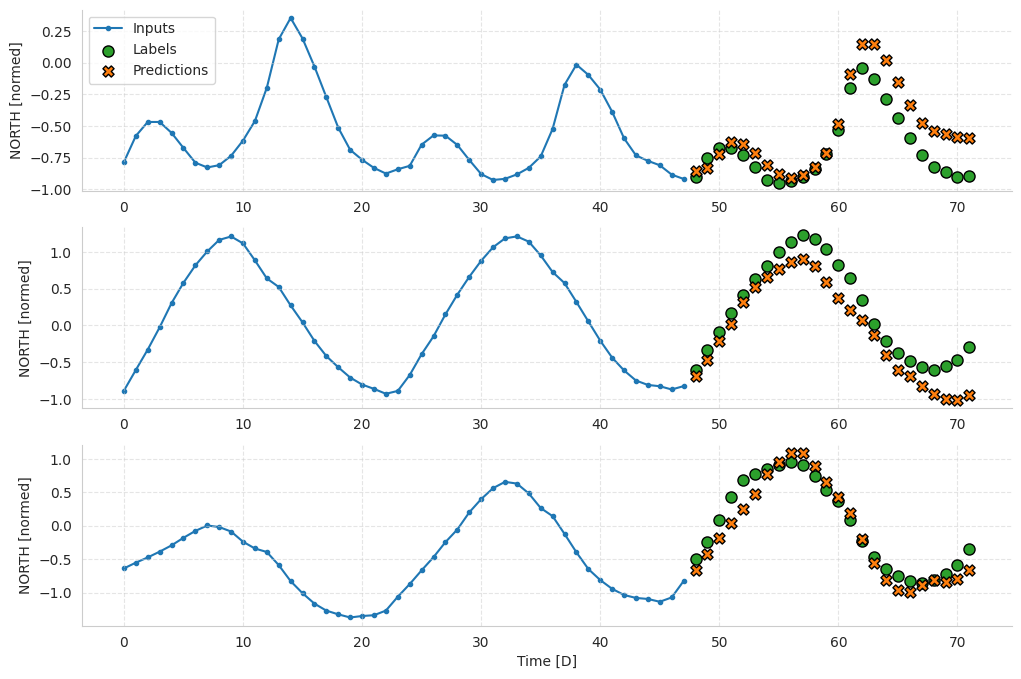

In [111]:
#transformer_v1.save(folders_nn+f'trans_v1')
encdec_v1 = tf.keras.models.load_model(folders_nn+f'encdec_v3')

multi_val_performance['encdec_v2'] = encdec_v1.evaluate(data_gen.val)
multi_performance['encdec_v2'] = encdec_v1.evaluate(data_gen.test)
data_gen.plot(encdec_v1)

In [112]:
multi_performance

{'Repeat': [0.29796865582466125, 0.36136215925216675, 0.5458650588989258],
 'LSTM': [0.3687010705471039, 0.43924644589424133, 0.597797691822052],
 'CNN_v0': [0.21508407592773438, 0.3282665014266968, 0.4637715816497803],
 'CNN_v1': [0.2636370360851288, 0.36930766701698303, 0.5134559869766235],
 'trans_v1': [0.26692530512809753, 0.37159082293510437, 0.5166481137275696],
 'encdec_v1': [0.2757013440132141, 0.37721380591392517, 0.5250727534294128],
 'encdec_v2': [0.30834993720054626, 0.41231319308280945, 0.5552927255630493]}

In [113]:
multi_val_performance

{'Repeat': [0.08807235956192017, 0.21613632142543793, 0.2967698276042938],
 'LSTM_v1': [0.09903813898563385, 0.22314530611038208, 0.2961405813694],
 'CNN_v0': [0.08383399248123169, 0.2141568809747696, 0.28954100608825684],
 'CNN_v1': [0.09807891398668289, 0.24250392615795135, 0.3131755292415619],
 'trans_v1': [0.0790049210190773, 0.21647338569164276, 0.28107815980911255],
 'encdec_v1': [0.07736872136592865, 0.20768126845359802, 0.27815237641334534],
 'encdec_v2': [0.08553111553192139, 0.22173120081424713, 0.29245704412460327]}

### **5.9 Transformer Based Encoder-Decoder Models**

In [114]:
def seq2seq_EcnDec_model_v2(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4,
                            num_heads=8,):
    ####################################################### INPUTS #######################################################
    # Encoder input with all input features
    encoder_inputs = tf.keras.layers.Input(shape=(input_sequence_length, num_features))
    decoder_inputs = tf.keras.layers.Lambda(lambda x: x[:, -forecast_horizon:, :num_forecast_features])(encoder_inputs)

    ################################################### ENCODER-DECODER ###################################################

    # Encoder with Transformer layers
    encoder_attention_output = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=num_features,name="MultiHead_1")(encoder_inputs, encoder_inputs)
    encoder_attention_output = tf.keras.layers.LayerNormalization(epsilon=1e-6,name="ln_1")(encoder_attention_output)

    encoder_outputs = tf.keras.layers.Dense(units=num_forecast_features, activation='relu',name="dense_1")(encoder_attention_output)
    encoder_outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6,name="ln_2")(encoder_outputs)

    # Decoder with Transformer layers and connection to encoder
    decoder_attention_output = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=num_features,name="MultiHead_2")(decoder_inputs, decoder_inputs)
    decoder_attention_output = tf.keras.layers.LayerNormalization(epsilon=1e-6,name="ln_3")(decoder_attention_output)

    decoder_attention_to_encoder_output = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=num_features,name="MultiHead_3")(decoder_attention_output, encoder_outputs)
    decoder_attention_to_encoder_output = tf.keras.layers.LayerNormalization(epsilon=1e-6,name="ln_4")(decoder_attention_to_encoder_output)

    output = tf.keras.layers.Dense(units=num_forecast_features, activation='linear',name="dense_2")(decoder_attention_to_encoder_output)
#    decoder_outputs = LayerNormalization(epsilon=1e-6)(decoder_outputs)

#    decoder_outputs = Dense(units=num_features, activation='relu')(decoder_attention_output)
#    decoder_outputs = LayerNormalization(epsilon=1e-6)(decoder_outputs)


#    output = tf.keras.layers.Dense(num_forecast_features)(decoder_outputs)


    ####################################################### THIRD #######################################################

    #  lstm_out = keras.layers.LSTM(lstm_units)(inputs)#

    #  x = tf.keras.layers.Concatenate()([x,lstm_out])

    #x = tf.keras.layers.GaussianNoise(0.025, seed=1978)(x)

    #  x = layers.Dense(mlp_units, activation="relu")(x)
    #  x = layers.Dropout(dropout)(x)

    #  output = tf.keras.layers.Dense(24*4)(x)
    # Shape => [batch, out_steps, features]
    #  output = tf.keras.layers.Reshape([24, 4])(output)

    model_attention = keras.Model(inputs=encoder_inputs, outputs=output)

    model_attention.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
                        tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
                        ])

    return model_attention

In [115]:
encdec_model= seq2seq_EcnDec_model_v2()
encdec_model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 48, 6)]      0           []                               
                                                                                                  
 MultiHead_1 (MultiHeadAttentio  (None, 48, 6)       1302        ['input_10[0][0]',               
 n)                                                               'input_10[0][0]']               
                                                                                                  
 lambda_4 (Lambda)              (None, 24, 4)        0           ['input_10[0][0]']               
                                                                                                  
 ln_1 (LayerNormalization)      (None, 48, 6)        12          ['MultiHead_1[0][0]']      

#### 5.9.1 Keras Tuner:

In [116]:
# Define the hyperparameter search space: EXPERIMENT 0 seq2seq_attention_model(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4,lstm_units=64):
hp = kt.HyperParameters()
hp.Choice('num_heads', values=[8,16,20,24]);
#hp.Choice('res_units_0', values=[64,128,256]);
#hp.Choice('res_units_1', values=[64,128,256]);
#hp.Choice('noise', values=[0.025,0.05]);
#hp.Choice('res_dropout_rate', values=[0.25,0.30]);
#hp.Choice('res_activation', values=["prelu","selu","swish"]);

# Define the hyperparameter search space: EXPERIMENT 3
#hp = kt.HyperParameters()
#hp.Choice('gn_noise', values=[0.05,0.1])
#hp.Choice('dropout', values=[0.30])
#hp.Choice('num_attention', values=[1])
#hp.Choice('n_heads', values=[4])
#hp.Choice('key_dim', values=[10,12])
#hp.Choice('units_0', values=[512,1024])
#hp.Choice('units_1', values=[128,256,512])
#hp.Choice('activation', values=['swish', 'gelu']);

In [117]:
# TRAIN MODEL seq2seq_attention_model(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4)
# Define Preprocessing steps:

class end_dec_model_optim(kt.HyperModel):
  def build(self, hp):

    model = seq2seq_EcnDec_model_v2(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4,
                            num_heads=hp.get("num_heads"))

    return model

In [118]:
# Create a tuner and search for the best hyperparameters
#tuner = GridSearch(end_dec_model_optim(), objective=kt.Objective("val_mean_absolute_error",direction="min"), hyperparameters=hp, overwrite=True)
#tuner.search(data_gen.train, validation_data=data_gen.val, epochs=30)

In [119]:
print("Best Model:")

#best_hyper = tuner.get_best_hyperparameters()[0].values
#tuner.get_best_hyperparameters()[0].values

Best Model:


In [120]:
print("Runner-up Model:")

#runnerup_hyper = tuner.get_best_hyperparameters(num_trials=2)[1].values
#tuner.get_best_hyperparameters(num_trials=2)[1].values

Runner-up Model:


In [121]:
#tuner.results_summary(num_trials=4)

In [122]:
#best_model = tuner.get_best_models(num_models=2)

#best_model[0].save(folders_nn+f'encdec_trans_v1')
#best_model[1].save(folders_nn+f'encdec_trans_v2')

#encdec_v1 = tf.keras.models.load_model(folders_nn+f'encdec_trans_v1')
#encdec_v2 = tf.keras.models.load_model(folders_nn+f'encdec_trans_v2')

#encdec_v1.save_weights(folders_nn+'encdec_trans_v1'+'/my_checkpoint_v1/')
#encdec_v2.save_weights(folders_nn+'encdec_trans_v2'+'/my_checkpoint_v2/')

In [123]:
#best_hyper = {'num_heads': 16}
#runner_hyper = {'num_heads': 24}

#encdec_v2 = seq2seq_EcnDec_model_v2(**best_hyper)

#encdec_v2.summary()

#encdec_v2.load_weights(folders_nn+'encdec_trans_v1'+'/my_checkpoint_v1/')

#### 5.7.2 Fit:

In [124]:
seed_everything(SEED)
# Compile the Callbacks:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_mean_absolute_error",
                                          factor=0.5,
                                          patience=5,
                                          verbose=1,
                                          mode="min")

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_mean_absolute_error",
                                              patience=10,
                                              verbose=1,
                                              mode="min",
                                              restore_best_weights=True)

checkpoint_filepath = folders_nn + 'checkpoint/'
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                save_weights_only=True,
                                                monitor="val_mean_absolute_error",
                                                mode='min',
                                                restore_best_weights=True)


#encdec_v2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00001),
#                  loss=tf.keras.losses.MeanSquaredError(),
#                  metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
#                            tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
#                            ])

#history = encdec_v2.fit(data_gen.train, epochs=100,
#                            validation_data=data_gen.val,
#                            callbacks=[red_lr,early_stop,Checkpoint])

26/26 [==============================] - 0s 5ms/step - loss: 0.3079 - mean_absolute_error: 0.4003 - rmse_score: 0.5548


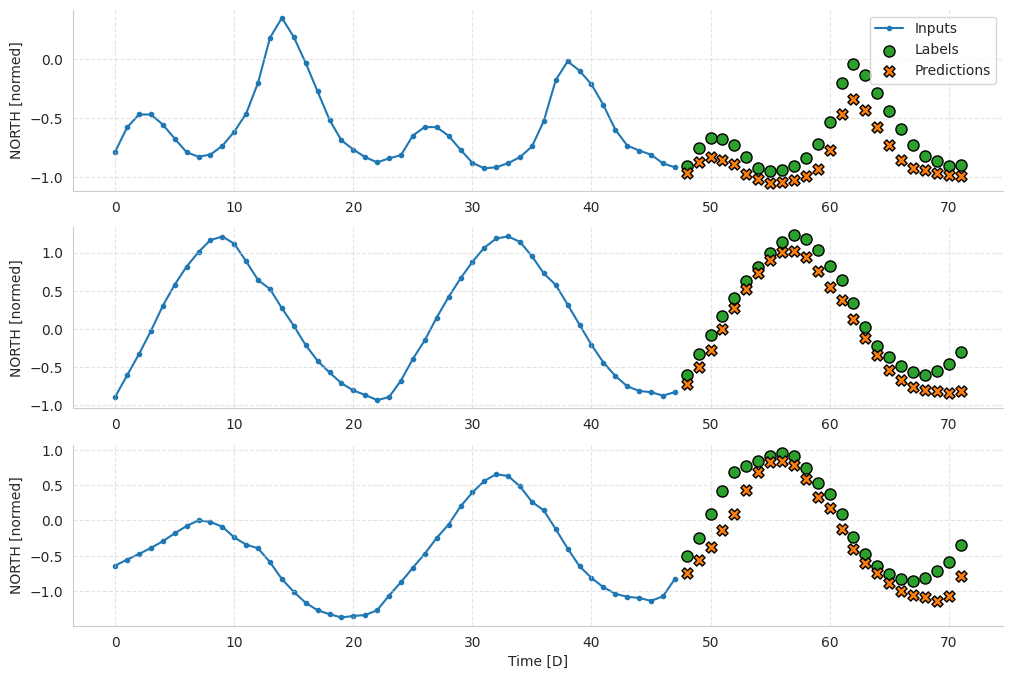

In [125]:
#transformer_v1.save(folders_nn+f'trans_v1')
encdec_v1 = tf.keras.models.load_model(folders_nn+'encdec_trans_v1')

multi_val_performance['trans_v3'] = encdec_v1.evaluate(data_gen.val)
multi_performance['trans_v3'] = encdec_v1.evaluate(data_gen.test)
data_gen.plot(encdec_v1)

In [126]:
multi_performance

{'Repeat': [0.29796865582466125, 0.36136215925216675, 0.5458650588989258],
 'LSTM': [0.3687010705471039, 0.43924644589424133, 0.597797691822052],
 'CNN_v0': [0.21508407592773438, 0.3282665014266968, 0.4637715816497803],
 'CNN_v1': [0.2636370360851288, 0.36930766701698303, 0.5134559869766235],
 'trans_v1': [0.26692530512809753, 0.37159082293510437, 0.5166481137275696],
 'encdec_v1': [0.2757013440132141, 0.37721380591392517, 0.5250727534294128],
 'encdec_v2': [0.30834993720054626, 0.41231319308280945, 0.5552927255630493],
 'trans_v3': [0.3078506886959076, 0.4003477096557617, 0.5548429489135742]}

In [127]:
multi_val_performance

{'Repeat': [0.08807235956192017, 0.21613632142543793, 0.2967698276042938],
 'LSTM_v1': [0.09903813898563385, 0.22314530611038208, 0.2961405813694],
 'CNN_v0': [0.08383399248123169, 0.2141568809747696, 0.28954100608825684],
 'CNN_v1': [0.09807891398668289, 0.24250392615795135, 0.3131755292415619],
 'trans_v1': [0.0790049210190773, 0.21647338569164276, 0.28107815980911255],
 'encdec_v1': [0.07736872136592865, 0.20768126845359802, 0.27815237641334534],
 'encdec_v2': [0.08553111553192139, 0.22173120081424713, 0.29245704412460327],
 'trans_v3': [0.09036879241466522, 0.23256491124629974, 0.30061402916908264]}

### 5.10 WaveNet:

In [128]:
class GatedActivationUnit(tf.keras.layers.Layer):
    def __init__(self, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.activation = tf.keras.activations.get(activation)

    def call(self, inputs):
        n_filters = inputs.shape[-1] // 2
        linear_output = self.activation(inputs[..., :n_filters])
        gate = tf.keras.activations.sigmoid(inputs[..., n_filters:])
        return self.activation(linear_output) * gate

In [129]:
def wavenet_residual_block(inputs, n_filters, dilation_rate):
    z = tf.keras.layers.Conv1D(2 * n_filters, kernel_size=2, padding="causal",
                            dilation_rate=dilation_rate)(inputs)
    z = GatedActivationUnit()(z)
    z = tf.keras.layers.Conv1D(n_filters, kernel_size=1)(z)
    return tf.keras.layers.Add()([z, inputs]), z

In [130]:
def wavenet_model(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4,
                  n_layers_per_block=3,n_blocks=2,n_filters=32):
    ####################################################### INPUTS #######################################################
    # input with all input features
    inputs = tf.keras.layers.Input(shape=(input_sequence_length, num_features))

    z = tf.keras.layers.Conv1D(n_filters, kernel_size=2, padding="causal")(inputs)
    skip_to_last = []
    for dilation_rate in [2**i for i in range(n_layers_per_block)] * n_blocks:
        z, skip = wavenet_residual_block(z, n_filters, dilation_rate)
        skip_to_last.append(skip)

    z = tf.keras.activations.relu(tf.keras.layers.Add()(skip_to_last))

    z = tf.keras.layers.Conv1D(n_filters, kernel_size=1, activation="relu")(z)
    #z = tf.keras.layers.Conv1D(forecast_horizon, kernel_size=1)(z)
    x = tf.keras.layers.Flatten()(z)
    #x = tf.keras.layers.GaussianNoise(0.05, seed=1978)(x)

 #   x = tf.keras.layers.Dense(256,kernel_initializer="he_normal")(x)
 #   x = tf.keras.layers.Dropout(0.25)(x)
 #   x = tf.keras.layers.BatchNormalization()(x)
 #   x = tf.keras.layers.PReLU()(x)

    output = tf.keras.layers.Dense(24*4)(x)
    # Shape => [batch, out_steps, features]
    output = tf.keras.layers.Reshape([24, 4])(output)

    full_wavenet_model = tf.keras.Model(inputs=[inputs], outputs=[output])


    full_wavenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00025),
                               loss=tf.keras.losses.MeanSquaredError(),
                               metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
                                        tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
                                 ])

    return full_wavenet_model

In [131]:
wavenet_ = wavenet_model()
wavenet_.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 48, 6)]      0           []                               
                                                                                                  
 conv1d_7 (Conv1D)              (None, 48, 32)       416         ['input_11[0][0]']               
                                                                                                  
 conv1d_8 (Conv1D)              (None, 48, 64)       4160        ['conv1d_7[0][0]']               
                                                                                                  
 gated_activation_unit (GatedAc  (None, 48, 32)      0           ['conv1d_8[0][0]']               
 tivationUnit)                                                                             

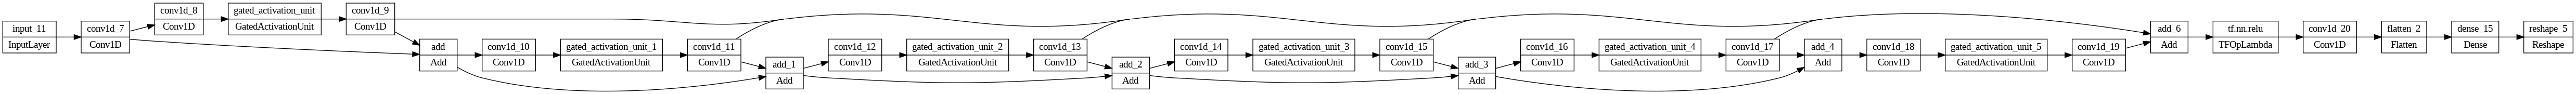

In [132]:
tf.keras.utils.plot_model(wavenet_,to_file="model.png",show_shapes=False,show_dtype=False,show_layer_names=True,rankdir="LR",
                           expand_nested=True,dpi=96,layer_range=None,show_layer_activations=False,show_trainable=False)

#### 5.10.1 Keras Tuner:

In [133]:
# Define the hyperparameter search space: EXPERIMENT 0 seq2seq_attention_model(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4,lstm_units=64):
hp = kt.HyperParameters()
hp.Choice('n_layers_per_block', values=[2,3,4]);
hp.Choice('n_blocks', values=[1,2,3]);
hp.Choice('n_filters', values=[32,64,128]);
#hp.Choice('noise', values=[0.025,0.05]);
#hp.Choice('res_dropout_rate', values=[0.25,0.30]);
#hp.Choice('res_activation', values=["prelu","selu","swish"]);

# Define the hyperparameter search space: EXPERIMENT 3
#hp = kt.HyperParameters()
#hp.Choice('gn_noise', values=[0.05,0.1])
#hp.Choice('dropout', values=[0.30])
#hp.Choice('num_attention', values=[1])
#hp.Choice('n_heads', values=[4])
#hp.Choice('key_dim', values=[10,12])
#hp.Choice('units_0', values=[512,1024])
#hp.Choice('units_1', values=[128,256,512])
#hp.Choice('activation', values=['swish', 'gelu']);

In [134]:
# TRAIN MODEL seq2seq_attention_model(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4)
# Define Preprocessing steps:

class wavenet_optim(kt.HyperModel):
  def build(self, hp):

    model = wavenet_model(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4,
                            n_layers_per_block=hp.get("n_layers_per_block"),n_blocks=hp.get("n_blocks"),n_filters=hp.get("n_filters"))

    return model

In [135]:
# Create a tuner and search for the best hyperparameters
#tuner = GridSearch(wavenet_optim(), objective=kt.Objective("val_mean_absolute_error",direction="min"), hyperparameters=hp, overwrite=True)
#tuner.search(data_gen.train, validation_data=data_gen.val, epochs=30)

In [136]:
print("Best Model:")

#best_hyper = tuner.get_best_hyperparameters()[0].values
#tuner.get_best_hyperparameters()[0].values

Best Model:


In [137]:
print("Runner-up Model:")

#runnerup_hyper = tuner.get_best_hyperparameters(num_trials=2)[1].values
#tuner.get_best_hyperparameters(num_trials=2)[1].values

Runner-up Model:


In [138]:
#tuner.results_summary(num_trials=4)

Results summary

Results in ./untitled_project

Showing 4 best trials

Objective(name="val_mean_absolute_error", direction="min")

- Trial 0000 summary

Hyperparameters:

n_layers_per_block: 2

n_blocks: 1

n_filters: 32

Score: 0.21583689749240875

- Trial 0013 summary
Hyperparameters:

n_layers_per_block: 3

n_blocks: 2

n_filters: 64

Score: 0.21785996854305267

- Trial 0002 summary

Hyperparameters:

n_layers_per_block: 2

n_blocks: 1

n_filters: 128

Score: 0.21839073300361633

- Trial 0014 summary

Hyperparameters:

n_layers_per_block: 3

n_blocks: 2

n_filters: 128
Score: 0.21886594593524933

In [139]:
#best_model = tuner.get_best_models(num_models=2)

#best_model[0].save(folders_nn+f'wavenet_v1')
#best_model[1].save(folders_nn+f'wavenet_v2')

#wavenet_model_v1 = tf.keras.models.load_model(folders_nn+f'wavenet_v1')
#wavenet_model_v2 = tf.keras.models.load_model(folders_nn+f'wavenet_v2')

#wavenet_model_v1.save_weights(folders_nn+'wavenet_v1'+'/my_checkpoint_v1/')
#wavenet_model_v2.save_weights(folders_nn+'wavenet_v2'+'/my_checkpoint_v2/')

In [140]:
#best_hyper = {'n_layers_per_block': 2, 'n_blocks': 1, 'n_filters': 32}
#runner_hyper = {'n_layers_per_block': 2, 'n_blocks': 1, 'n_filters': 128}

#wavenet_v1 = wavenet_model(**best_hyper)
#wavenet_v1.summary()

#wavenet_v1.load_weights(folders_nn+'wavenet_v1'+'/my_checkpoint_v1/')

#### 5.9.2 Fit:

In [141]:
seed_everything(SEED)
# Compile the Callbacks:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_mean_absolute_error",
                                          factor=0.5,
                                          patience=5,
                                          verbose=1,
                                          mode="min")

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_mean_absolute_error",
                                              patience=10,
                                              verbose=1,
                                              mode="min",
                                              restore_best_weights=True)

checkpoint_filepath = folders_nn + 'checkpoint/'
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                save_weights_only=True,
                                                monitor="val_mean_absolute_error",
                                                mode='min',
                                                restore_best_weights=True)


#wavenet_v1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00001),
#                  loss=tf.keras.losses.MeanSquaredError(),
#                  metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
#                            tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
#                            ])

#wavenet_v1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005),
#                    loss=tf.keras.losses.MeanSquaredError(),
#                    metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
#                              tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
#                              ])

#history = wavenet_v1.fit(data_gen.train, epochs=100,
#                            validation_data=data_gen.val,
#                            callbacks=[red_lr,early_stop,Checkpoint])

26/26 [==============================] - 0s 7ms/step - loss: 0.2497 - mean_absolute_error: 0.3570 - rmse_score: 0.4997


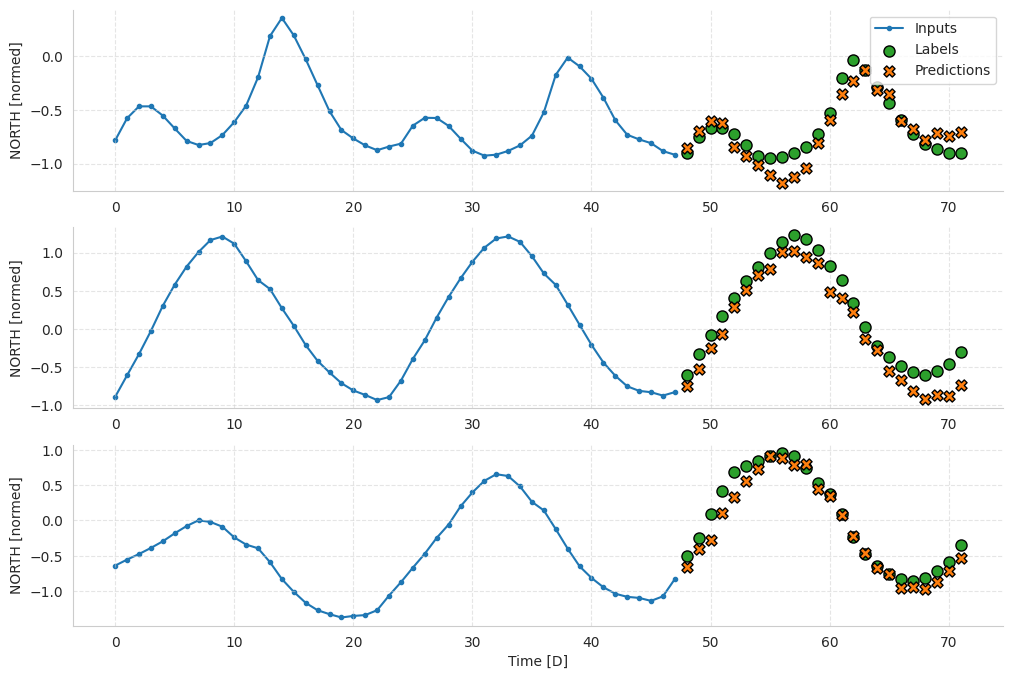

In [142]:
#wavenet_v1.save(folders_nn+f'wavenet_v1')
wavenet_v1 = tf.keras.models.load_model(folders_nn+'wavenet_v1')

multi_val_performance['wavenet_v1'] = wavenet_v1.evaluate(data_gen.val)
multi_performance['wavenet_v1'] = wavenet_v1.evaluate(data_gen.test)
data_gen.plot(wavenet_v1)

In [143]:
multi_performance

{'Repeat': [0.29796865582466125, 0.36136215925216675, 0.5458650588989258],
 'LSTM': [0.3687010705471039, 0.43924644589424133, 0.597797691822052],
 'CNN_v0': [0.21508407592773438, 0.3282665014266968, 0.4637715816497803],
 'CNN_v1': [0.2636370360851288, 0.36930766701698303, 0.5134559869766235],
 'trans_v1': [0.26692530512809753, 0.37159082293510437, 0.5166481137275696],
 'encdec_v1': [0.2757013440132141, 0.37721380591392517, 0.5250727534294128],
 'encdec_v2': [0.30834993720054626, 0.41231319308280945, 0.5552927255630493],
 'trans_v3': [0.3078506886959076, 0.4003477096557617, 0.5548429489135742],
 'wavenet_v1': [0.24972355365753174, 0.35704752802848816, 0.4997234344482422]}

In [144]:
multi_val_performance

{'Repeat': [0.08807235956192017, 0.21613632142543793, 0.2967698276042938],
 'LSTM_v1': [0.09903813898563385, 0.22314530611038208, 0.2961405813694],
 'CNN_v0': [0.08383399248123169, 0.2141568809747696, 0.28954100608825684],
 'CNN_v1': [0.09807891398668289, 0.24250392615795135, 0.3131755292415619],
 'trans_v1': [0.0790049210190773, 0.21647338569164276, 0.28107815980911255],
 'encdec_v1': [0.07736872136592865, 0.20768126845359802, 0.27815237641334534],
 'encdec_v2': [0.08553111553192139, 0.22173120081424713, 0.29245704412460327],
 'trans_v3': [0.09036879241466522, 0.23256491124629974, 0.30061402916908264],
 'wavenet_v1': [0.08249982446432114, 0.2132948637008667, 0.2872277796268463]}

### 5.11 WaveNet v1:

In [145]:
def wavenet_model_v2(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4,
                  n_blocks=4,units_0=64,dropout=0):
    ####################################################### INPUTS #######################################################
    # input with all input features
    input = tf.keras.layers.Input(shape=(input_sequence_length, num_features))
    z1 = tf.keras.layers.Lambda(lambda x: x[:, -forecast_horizon:, :num_forecast_features])(input)

    ####################################################### Layers #######################################################
    new_initial_state=None
    skip_to_last = []
    z0=input
    for nb in range(n_blocks):
        z0, z2, new_initial_state = LSTM_block(z0, z1, units_0, kernel_regularizer=None,dropout=dropout,recurrent_dropout=0.,name=f"block_{nb}",initial_state=new_initial_state)
        skip_to_last.append(z2)


    z = tf.keras.activations.relu(tf.keras.layers.Add()(skip_to_last))
    z = keras.layers.LayerNormalization(epsilon=1e-6)(z)

#    z = tf.keras.layers.Conv1D(32, kernel_size=1, activation="relu")(z)
#    x = tf.keras.layers.Flatten()(z)
#     x = tf.keras.layers.GaussianNoise(0.05, seed=1978)(x)

 #   x = tf.keras.layers.Dense(256,kernel_initializer="he_normal")(x)
 #   x = tf.keras.layers.Dropout(0.25)(x)
 #   x = tf.keras.layers.BatchNormalization()(x)
 #   x = tf.keras.layers.PReLU()(x)

    output = tf.keras.layers.Dense(num_forecast_features)(z)

    full_wavenet_model = tf.keras.Model(inputs=[input], outputs=[output])


    full_wavenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00025),
                               loss=tf.keras.losses.MeanSquaredError(),
                               metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
                                        tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
                                 ])

    return full_wavenet_model

In [146]:
wavenet_v2 = wavenet_model_v2()
#wavenet_v2.summary()

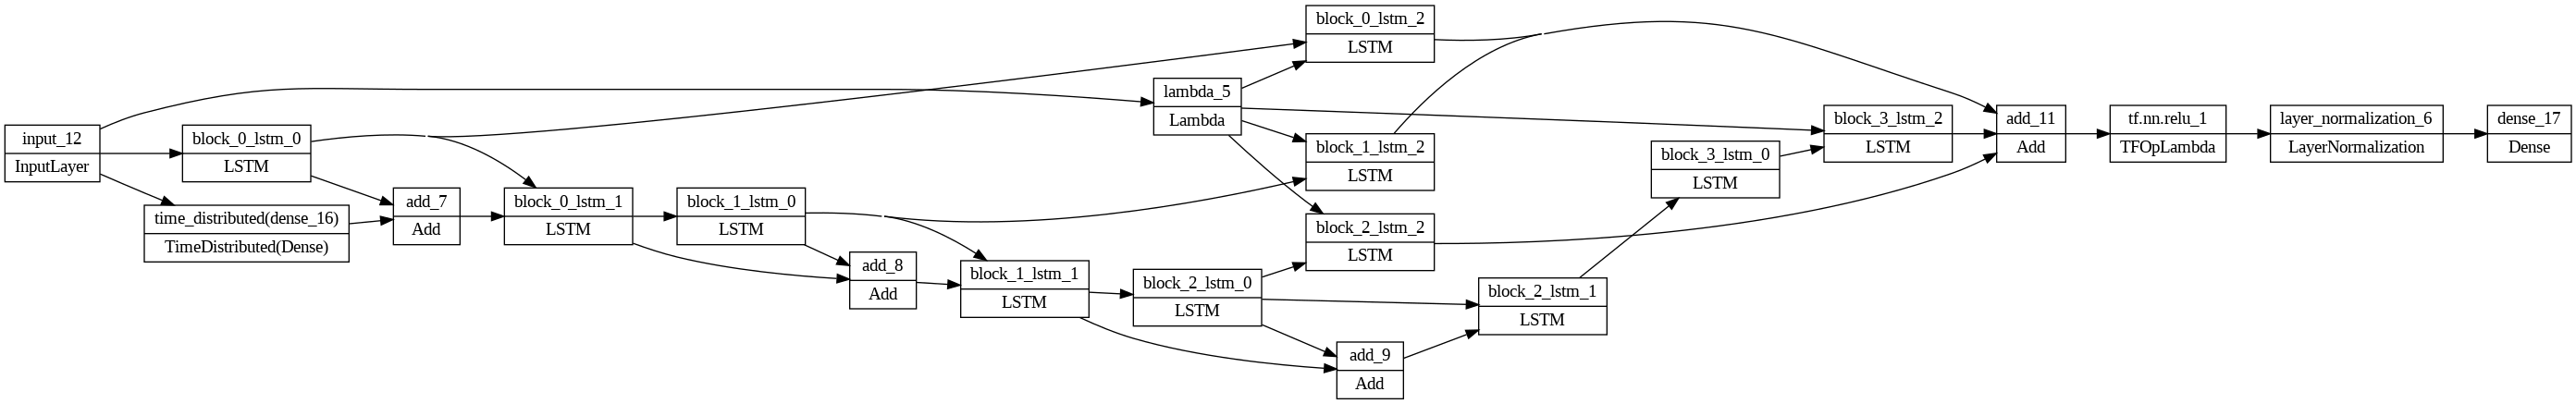

In [147]:
tf.keras.utils.plot_model(wavenet_v2,to_file="model.png",show_shapes=False,show_dtype=False,show_layer_names=True,rankdir="LR",
                           expand_nested=True,dpi=96,layer_range=None,show_layer_activations=False,show_trainable=False)

#### 5.11.1 Keras Tuner:

In [148]:
# Define the hyperparameter search space: EXPERIMENT 0
# wavenet_model_v2(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4,n_blocks=4,units_0=64):
hp = kt.HyperParameters()
hp.Choice('n_blocks', values=[2,3,4]);
hp.Choice('dropout', values=[0.0,0.2,0.3]);
hp.Choice('units_0', values=[32,64,128]);
#hp.Choice('noise', values=[0.025,0.05]);
#hp.Choice('res_dropout_rate', values=[0.25,0.30]);
#hp.Choice('res_activation', values=["prelu","selu","swish"]);

# Define the hyperparameter search space: EXPERIMENT 3
#hp = kt.HyperParameters()
#hp.Choice('gn_noise', values=[0.05,0.1])
#hp.Choice('dropout', values=[0.30])
#hp.Choice('num_attention', values=[1])
#hp.Choice('n_heads', values=[4])
#hp.Choice('key_dim', values=[10,12])
#hp.Choice('units_0', values=[512,1024])
#hp.Choice('units_1', values=[128,256,512])
#hp.Choice('activation', values=['swish', 'gelu']);

In [149]:
# TRAIN MODEL seq2seq_attention_model(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4)
# Define Preprocessing steps:

class wavenet_optim(kt.HyperModel):
  def build(self, hp):

    model = wavenet_model_v2(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4,n_blocks=hp.get("n_blocks"),units_0=hp.get("units_0"),dropout=hp.get("dropout"))

    return model

In [150]:
# Create a tuner and search for the best hyperparameters
#tuner = GridSearch(wavenet_optim(), objective=kt.Objective("val_mean_absolute_error",direction="min"), hyperparameters=hp, overwrite=True)
#tuner.search(data_gen.train, validation_data=data_gen.val, epochs=30)

In [151]:
print("Best Model:")

#best_hyper = tuner.get_best_hyperparameters()[0].values
#tuner.get_best_hyperparameters()[0].values

Best Model:


In [152]:
print("Runner-up Model:")

#runnerup_hyper = tuner.get_best_hyperparameters(num_trials=2)[1].values
#tuner.get_best_hyperparameters(num_trials=2)[1].values

Runner-up Model:


In [153]:
#tuner.results_summary(num_trials=4)

**Results summary**

Results in ./untitled_project

Showing 4 best trials

Objective(name="val_mean_absolute_error", direction="min")

* **Trial 0004 summary**

  Hyperparameters:
  * n_blocks: 2
  * dropout: 0.2
  * units_0: 64

  Score: 0.22131626307964325

* **Trial 0021 summary**

  Hyperparameters:
  * n_blocks: 4
  * dropout: 0.2
  * units_0: 32
  
  Score: 0.22432130575180054

In [154]:
#best_model = tuner.get_best_models(num_models=2)

#best_model[0].save(folders_nn+f'wavenet_Lstm_v1')
#best_model[1].save(folders_nn+f'wavenet_Lstm_v2')

#wavenet_model_v1 = tf.keras.models.load_model(folders_nn+f'wavenet_Lstm_v1')
#wavenet_model_v2 = tf.keras.models.load_model(folders_nn+f'wavenet_Lstm_v2')

#wavenet_model_v1.save_weights(folders_nn+'wavenet_Lstm_v1'+'/my_checkpoint_v1/')
#wavenet_model_v2.save_weights(folders_nn+'wavenet_Lstm_v2'+'/my_checkpoint_v2/')

In [155]:
best_hyper = {'n_blocks': 2, 'dropout': 0.2, 'units_0': 64}
#runner_hyper = {'n_blocks': 4, 'dropout': 0.2, 'units_0': 32}

wavenet_v2 = wavenet_model_v2(**best_hyper)
wavenet_v2.summary()

wavenet_v2.load_weights(folders_nn+'wavenet_Lstm_v1'+'/my_checkpoint_v1/')

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 48, 6)]      0           []                               
                                                                                                  
 block_0_lstm_0 (LSTM)          [(None, 48, 64),     18176       ['input_13[0][0]']               
                                 (None, 64),                                                      
                                 (None, 64)]                                                      
                                                                                                  
 time_distributed_1 (TimeDistri  (None, 48, 64)      448         ['input_13[0][0]']               
 buted)                                                                                    

#### 5.11.2 Fit:

In [156]:
seed_everything(SEED)
# Compile the Callbacks:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_mean_absolute_error",
                                          factor=0.5,
                                          patience=5,
                                          verbose=1,
                                          mode="min")

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_mean_absolute_error",
                                              patience=10,
                                              verbose=1,
                                              mode="min",
                                              restore_best_weights=True)

checkpoint_filepath = folders_nn + 'checkpoint/'
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                save_weights_only=True,
                                                monitor="val_mean_absolute_error",
                                                mode='min',
                                                restore_best_weights=True)


wavenet_v2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00001),
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
                            tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
                            ])

#wavenet_v2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005),
#                    loss=tf.keras.losses.MeanSquaredError(),
#                    metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
#                              tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
#                              ])

#history = wavenet_v2.fit(data_gen.train, epochs=100,
#                            validation_data=data_gen.val,
#                            callbacks=[red_lr,early_stop,Checkpoint])

26/26 [==============================] - 0s 7ms/step - loss: 0.2948 - mean_absolute_error: 0.3878 - rmse_score: 0.5430


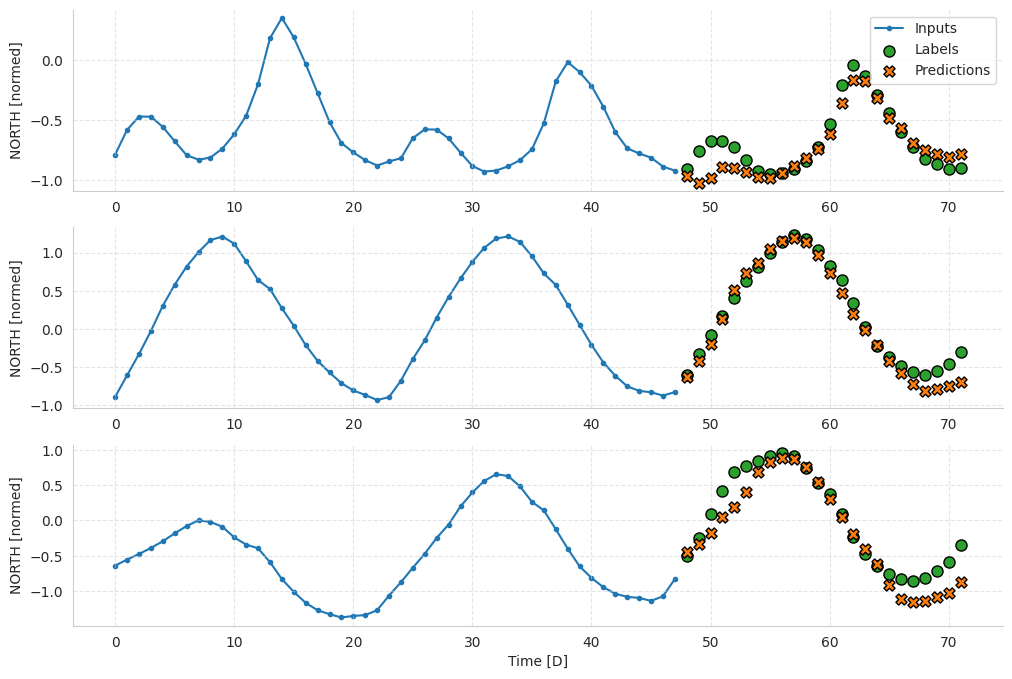

In [157]:
#wavenet_v1.save(folders_nn+f'wavenet_v1')
wavenet_v2 = tf.keras.models.load_model(folders_nn+'wavenet_Lstm_v1')

multi_val_performance['wav_Lstm_v1'] = wavenet_v2.evaluate(data_gen.val)
multi_performance['wav_Lstm_v1'] = wavenet_v2.evaluate(data_gen.test)
data_gen.plot(wavenet_v2)

In [158]:
multi_performance

{'Repeat': [0.29796865582466125, 0.36136215925216675, 0.5458650588989258],
 'LSTM': [0.3687010705471039, 0.43924644589424133, 0.597797691822052],
 'CNN_v0': [0.21508407592773438, 0.3282665014266968, 0.4637715816497803],
 'CNN_v1': [0.2636370360851288, 0.36930766701698303, 0.5134559869766235],
 'trans_v1': [0.26692530512809753, 0.37159082293510437, 0.5166481137275696],
 'encdec_v1': [0.2757013440132141, 0.37721380591392517, 0.5250727534294128],
 'encdec_v2': [0.30834993720054626, 0.41231319308280945, 0.5552927255630493],
 'trans_v3': [0.3078506886959076, 0.4003477096557617, 0.5548429489135742],
 'wavenet_v1': [0.24972355365753174, 0.35704752802848816, 0.4997234344482422],
 'wav_Lstm_v1': [0.29484450817108154, 0.38775742053985596, 0.542995810508728]}

In [159]:
multi_val_performance

{'Repeat': [0.08807235956192017, 0.21613632142543793, 0.2967698276042938],
 'LSTM_v1': [0.09903813898563385, 0.22314530611038208, 0.2961405813694],
 'CNN_v0': [0.08383399248123169, 0.2141568809747696, 0.28954100608825684],
 'CNN_v1': [0.09807891398668289, 0.24250392615795135, 0.3131755292415619],
 'trans_v1': [0.0790049210190773, 0.21647338569164276, 0.28107815980911255],
 'encdec_v1': [0.07736872136592865, 0.20768126845359802, 0.27815237641334534],
 'encdec_v2': [0.08553111553192139, 0.22173120081424713, 0.29245704412460327],
 'trans_v3': [0.09036879241466522, 0.23256491124629974, 0.30061402916908264],
 'wavenet_v1': [0.08249982446432114, 0.2132948637008667, 0.2872277796268463],
 'wav_Lstm_v1': [0.08520340174436569,
  0.22131623327732086,
  0.29189616441726685]}

### 5.12 WaveNet Transformer:

In [160]:
class GatedActivationUnit(tf.keras.layers.Layer):
    def __init__(self, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.activation = tf.keras.activations.get(activation)

    def call(self, inputs):
        n_filters = inputs.shape[-1] // 2
        linear_output = self.activation(inputs[..., :n_filters])
        gate = tf.keras.activations.sigmoid(inputs[..., n_filters:])
        return self.activation(linear_output) * gate

In [161]:
def wavenet_model_v2(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4,
                  n_blocks=4,units_0=64,dropout=0, filters=32, head_size=6, num_heads=4, att_layers=2):
    ####################################################### INPUTS #######################################################
    # input with all input features
    input = tf.keras.layers.Input(shape=(input_sequence_length, num_features))
    z1 = tf.keras.layers.Lambda(lambda x: x[:, -forecast_horizon:, :num_forecast_features])(input)

    ####################################################### Layers #######################################################
    new_initial_state=None
    skip_to_last = []
    z0=input
    for nb in range(n_blocks):
        z0, z2, new_initial_state = LSTM_block(z0, z1, units_0, kernel_regularizer=None,dropout=dropout,recurrent_dropout=0.,name=f"block_{nb}",initial_state=new_initial_state)
        skip_to_last.append(z2)


    z = tf.keras.activations.relu(tf.keras.layers.Add()(skip_to_last))
    z = keras.layers.LayerNormalization(epsilon=1e-6)(z)

    ####################################################### Transformer #######################################################
    for _ in range(att_layers):
      x = keras.layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(z0, z1)
      x = keras.layers.Dropout(dropout)(x)
      x = keras.layers.LayerNormalization(epsilon=1e-6)(x)
      res = x + z0

      # Feed Forward Part
      x = layers.Conv1D(filters=filters, kernel_size=1, activation="relu")(res)
      x = layers.Dropout(dropout)(x)
      x = layers.Conv1D(filters=example_inputs.shape[-1], kernel_size=1)(x)
      x = layers.LayerNormalization(epsilon=1e-6)(x)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)

    #######################################################

    output_1 = tf.keras.layers.Dense(num_forecast_features)(z)

    output_2 = tf.keras.layers.Dense(num_forecast_features*forecast_horizon)(x)

    output_2 = tf.keras.layers.Reshape([24, 4])(output_2)


    output = tf.keras.layers.Add()([output_1,output_2])
    output = tf.keras.layers.LeakyReLU()(output)
    output = tf.keras.layers.Dense(num_forecast_features)(output)


    full_wavenet_model = tf.keras.Model(inputs=[input], outputs=[output])


    full_wavenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00025),
                               loss=tf.keras.losses.MeanSquaredError(),
                               metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
                                        tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
                                 ])

    return full_wavenet_model

In [162]:
wavenet_v3 = wavenet_model_v2()
#wavenet_v3.summary()

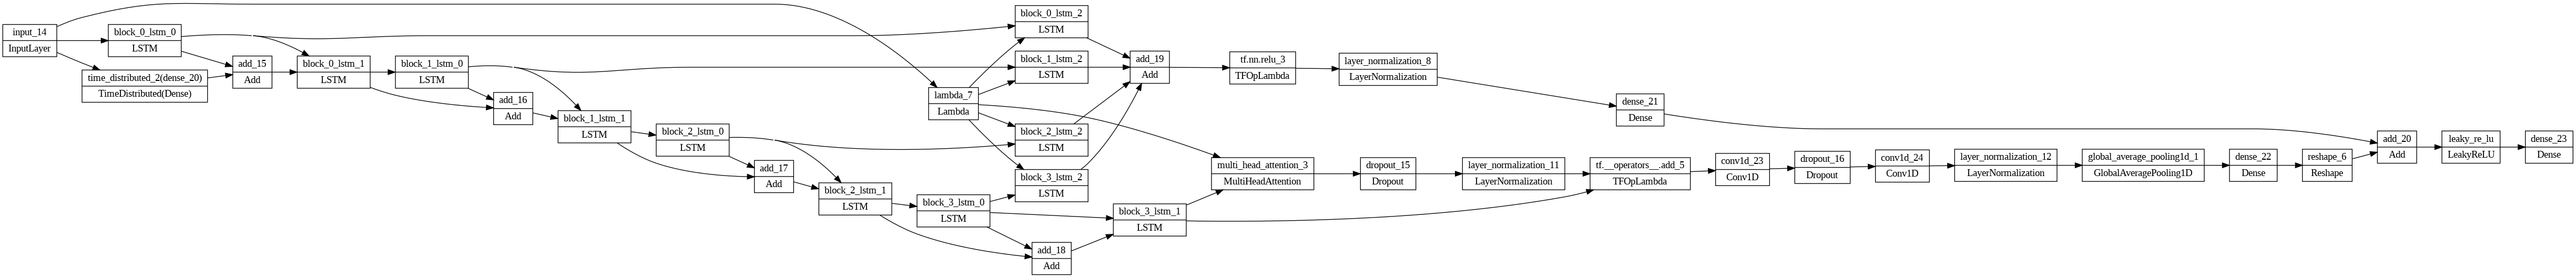

In [163]:
tf.keras.utils.plot_model(wavenet_v3,to_file="model.png",show_shapes=False,show_dtype=False,show_layer_names=True,rankdir="LR",
                           expand_nested=True,dpi=96,layer_range=None,show_layer_activations=False,show_trainable=False)

#### 5.11.1 Keras Tuner:

In [164]:
# Define the hyperparameter search space: EXPERIMENT 0
# wavenet_model_v2(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4,n_blocks=4,units_0=64):
hp = kt.HyperParameters()
hp.Choice('n_blocks', values=[2,3]);
hp.Choice('dropout', values=[0.25,0.33]);
hp.Choice('units_0', values=[32,64]);

hp.Choice('head_size', values=[6,8,12])#
hp.Choice('att_layers', values=[1,2,3])
hp.Choice('num_heads', values=[4,6,8])#
hp.Choice('filters', values=[32,64,128])

32

In [165]:
# TRAIN MODEL seq2seq_attention_model(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4)
# Define Preprocessing steps:

class wavenet_optim(kt.HyperModel):
  def build(self, hp):

    model = wavenet_model_v2(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4,
                             n_blocks=hp.get("n_blocks"), units_0=hp.get("units_0"),dropout=hp.get("dropout"),
                             filters=hp.get("filters"), head_size=hp.get("head_size"),att_layers=hp.get("att_layers"),
                             num_heads=hp.get("num_heads"))

    return model

In [166]:
# Create a tuner and search for the best hyperparameters
#tuner = BayesianOptimization(wavenet_optim(), objective=kt.Objective("val_mean_absolute_error",direction="min"), hyperparameters=hp, overwrite=True, max_trials=35)
#tuner.search(data_gen.train, validation_data=data_gen.val, epochs=30)

In [167]:
print("Best Model:")

#best_hyper = tuner.get_best_hyperparameters()[0].values
#tuner.get_best_hyperparameters()[0].values

Best Model:


In [168]:
print("Runner-up Model:")

#runnerup_hyper = tuner.get_best_hyperparameters(num_trials=2)[1].values
#tuner.get_best_hyperparameters(num_trials=2)[1].values

Runner-up Model:


In [169]:
#tuner.results_summary(num_trials=4)

In [170]:
#best_model = tuner.get_best_models(num_models=2)

#best_model[0].save(folders_nn+f'wavenet_Lstm_v3')
#best_model[1].save(folders_nn+f'wavenet_Lstm_v4')

#wavenet_model_v1 = tf.keras.models.load_model(folders_nn+f'wavenet_Lstm_v3')
#wavenet_model_v2 = tf.keras.models.load_model(folders_nn+f'wavenet_Lstm_v4')

#wavenet_model_v1.save_weights(folders_nn+'wavenet_Lstm_v3'+'/my_checkpoint_v1/')
#wavenet_model_v2.save_weights(folders_nn+'wavenet_Lstm_v4'+'/my_checkpoint_v2/')

In [171]:
#best_hyper = {'n_blocks': 3, 'dropout': 0.25, 'units_0': 32, 'head_size': 8, 'att_layers': 1, 'num_heads': 4, 'filters': 32}
#runner_hyper = {'n_blocks': 4, 'dropout': 0.2, 'units_0': 32}

#wavenet_v2 = wavenet_model_v2(**best_hyper)
#wavenet_v2.summary()

#wavenet_v2.load_weights(folders_nn+'wavenet_Lstm_v3'+'/my_checkpoint_v1/')

#### 5.11.2 Fit:

In [172]:
seed_everything(SEED)
# Compile the Callbacks:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_mean_absolute_error",
                                          factor=0.5,
                                          patience=5,
                                          verbose=1,
                                          mode="min")

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_mean_absolute_error",
                                              patience=10,
                                              verbose=1,
                                              mode="min",
                                              restore_best_weights=True)

checkpoint_filepath = folders_nn + 'checkpoint/'
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                save_weights_only=True,
                                                monitor="val_mean_absolute_error",
                                                mode='min',
                                                restore_best_weights=True)


wavenet_v2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00001),
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
                            tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
                            ])

#wavenet_v2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005),
#                    loss=tf.keras.losses.MeanSquaredError(),
#                    metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
#                              tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
#                              ])

#history = wavenet_v2.fit(data_gen.train, epochs=100,
#                            validation_data=data_gen.val,
#                            callbacks=[red_lr,early_stop,Checkpoint])

26/26 [==============================] - 0s 11ms/step - loss: 0.3436 - mean_absolute_error: 0.4136 - rmse_score: 0.5862


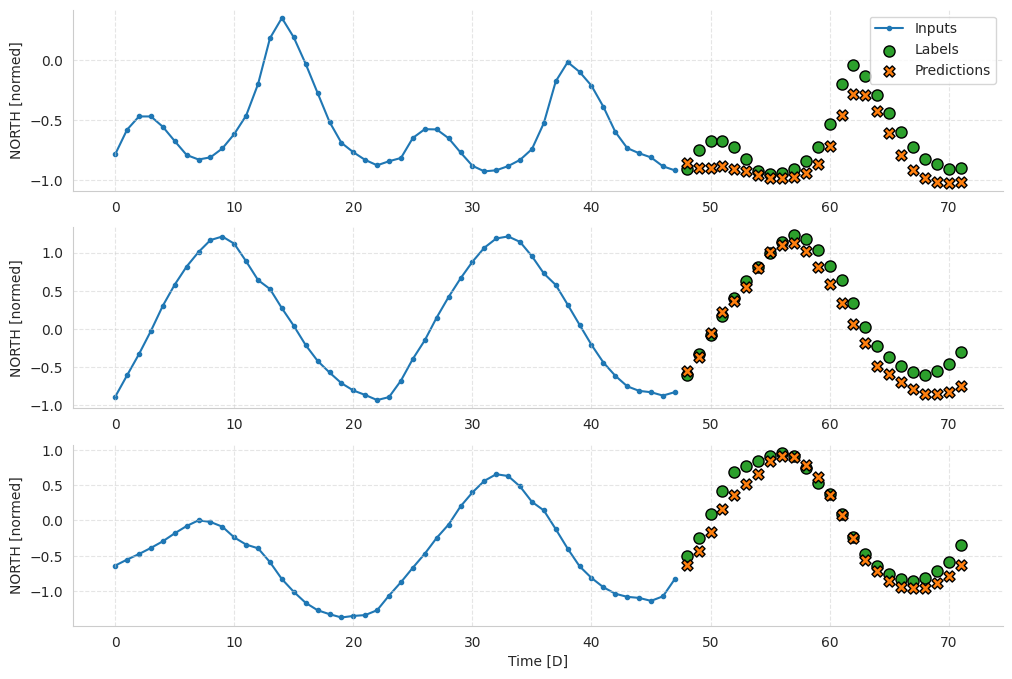

In [173]:
#wavenet_v1.save(folders_nn+f'wavenet_v1')
wavenet_v3 = tf.keras.models.load_model(folders_nn+'wavenet_Lstm_v3')

multi_val_performance['wav_Lstm_v3'] = wavenet_v3.evaluate(data_gen.val)
multi_performance['wav_Lstm_v3'] = wavenet_v3.evaluate(data_gen.test)
data_gen.plot(wavenet_v3)

In [174]:
multi_performance

{'Repeat': [0.29796865582466125, 0.36136215925216675, 0.5458650588989258],
 'LSTM': [0.3687010705471039, 0.43924644589424133, 0.597797691822052],
 'CNN_v0': [0.21508407592773438, 0.3282665014266968, 0.4637715816497803],
 'CNN_v1': [0.2636370360851288, 0.36930766701698303, 0.5134559869766235],
 'trans_v1': [0.26692530512809753, 0.37159082293510437, 0.5166481137275696],
 'encdec_v1': [0.2757013440132141, 0.37721380591392517, 0.5250727534294128],
 'encdec_v2': [0.30834993720054626, 0.41231319308280945, 0.5552927255630493],
 'trans_v3': [0.3078506886959076, 0.4003477096557617, 0.5548429489135742],
 'wavenet_v1': [0.24972355365753174, 0.35704752802848816, 0.4997234344482422],
 'wav_Lstm_v1': [0.29484450817108154, 0.38775742053985596, 0.542995810508728],
 'wav_Lstm_v3': [0.34364449977874756, 0.4135718047618866, 0.5862119793891907]}

In [175]:
multi_val_performance

{'Repeat': [0.08807235956192017, 0.21613632142543793, 0.2967698276042938],
 'LSTM_v1': [0.09903813898563385, 0.22314530611038208, 0.2961405813694],
 'CNN_v0': [0.08383399248123169, 0.2141568809747696, 0.28954100608825684],
 'CNN_v1': [0.09807891398668289, 0.24250392615795135, 0.3131755292415619],
 'trans_v1': [0.0790049210190773, 0.21647338569164276, 0.28107815980911255],
 'encdec_v1': [0.07736872136592865, 0.20768126845359802, 0.27815237641334534],
 'encdec_v2': [0.08553111553192139, 0.22173120081424713, 0.29245704412460327],
 'trans_v3': [0.09036879241466522, 0.23256491124629974, 0.30061402916908264],
 'wavenet_v1': [0.08249982446432114, 0.2132948637008667, 0.2872277796268463],
 'wav_Lstm_v1': [0.08520340174436569,
  0.22131623327732086,
  0.29189616441726685],
 'wav_Lstm_v3': [0.08422792702913284, 0.2214747816324234, 0.2902204990386963]}

### 5.13 WaveNet v3:

In [176]:
input_sequence_length=48
num_features = 6

def create_DC_CNN_Model(sequence_length=input_sequence_length,num_features=num_features,dropout=0.8):

    ####################################################### INPUTS #######################################################
    model_input = tf.keras.layers.Input(shape=(sequence_length, num_features))

    # Layers 1 to 6 with DC_CNN Blocks
    l1_out, l1_residual = DC_CNN_Block(32, 2, 1)(model_input)
    l2_out, l2_residual = DC_CNN_Block(32, 2, 2)(l1_out)
    l3_out, l3_residual = DC_CNN_Block(32, 2, 4)(l2_out)
    l4_out, l4_residual = DC_CNN_Block(32, 2, 8)(l3_out)
    l5_out, l5_residual = DC_CNN_Block(32, 2, 16)(l4_out)
    l6_out, l6_residual = DC_CNN_Block(32, 2, 32)(l5_out)
    l6_residual = tf.keras.layers.Dropout(dropout)(l6_residual)

    # Layer 7 with DC_CNN Block
    l7_out, l7_residual = DC_CNN_Block(32, 2, 64)(l6_out)
    l7_residual = tf.keras.layers.Dropout(dropout)(l7_residual)

    # Combining residuals from layers
    combined_residuals = tf.keras.layers.Add()([l1_residual, l2_residual, l3_residual, l4_residual, l5_residual, l6_residual, l7_residual])
    activated_combined_residuals = tf.keras.layers.Activation('relu')(combined_residuals)

    # Final Convolution Layer
    x = tf.keras.layers.Flatten()(activated_combined_residuals)
    final_output = tf.keras.layers.Dense(24*4)(x)
    # Shape => [batch, out_steps, features]
    final_output = tf.keras.layers.Reshape([24, 4])(final_output)

    # Creating and compiling the model
    model_instance = tf.keras.Model(inputs=[model_input], outputs=[final_output])


    model_instance.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005),
                               loss=tf.keras.losses.MeanSquaredError(),
                               metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
                                        tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
                                 ])

    return model_instance

In [177]:
wavenet_v3 = create_DC_CNN_Model()
#wavenet_v3.summary()

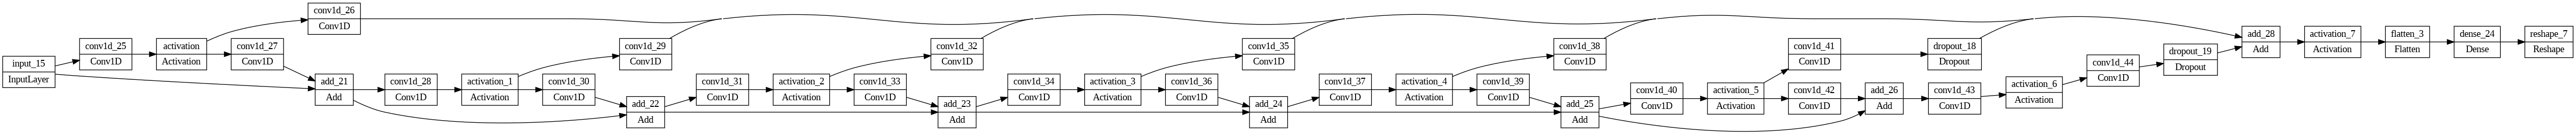

In [178]:
tf.keras.utils.plot_model(wavenet_v3,to_file="model.png",show_shapes=False,show_dtype=False,show_layer_names=True,rankdir="LR",
                           expand_nested=True,dpi=96,layer_range=None,show_layer_activations=False,show_trainable=False)

#### 5.13.1 Keras Tuner:

In [179]:
# Define the hyperparameter search space: EXPERIMENT 0
# wavenet_model_v2(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4,n_blocks=4,units_0=64):
hp = kt.HyperParameters()
#hp.Choice('n_blocks', values=[2,3]);
hp.Choice('dropout', values=[0.3,0.4,0.5,0.7]);

In [180]:
# TRAIN MODEL seq2seq_attention_model(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4)
# Define Preprocessing steps:

class wavenet_optim(kt.HyperModel):
  def build(self, hp):

    model = create_DC_CNN_Model(dropout=hp.get("dropout"))

    return model

In [181]:
# Create a tuner and search for the best hyperparameters
#tuner = GridSearch(wavenet_optim(), objective=kt.Objective("val_mean_absolute_error",direction="min"), hyperparameters=hp, overwrite=True)
#tuner.search(data_gen.train, validation_data=data_gen.val, epochs=30)

In [182]:
print("Best Model:")

#best_hyper = tuner.get_best_hyperparameters()[0].values
#tuner.get_best_hyperparameters()[0].values

Best Model:


In [183]:
print("Runner-up Model:")

#runnerup_hyper = tuner.get_best_hyperparameters(num_trials=2)[1].values
#tuner.get_best_hyperparameters(num_trials=2)[1].values

Runner-up Model:


In [184]:
#tuner.results_summary(num_trials=4)

In [185]:
#best_model = tuner.get_best_models(num_models=2)

#best_model[0].save(folders_nn+f'wavenet_v5')
#best_model[1].save(folders_nn+f'wavenet_v6')

#wavenet_model_v1 = tf.keras.models.load_model(folders_nn+f'wavenet_v5')
#wavenet_model_v2 = tf.keras.models.load_model(folders_nn+f'wavenet_v6')

#wavenet_model_v1.save_weights(folders_nn+'wavenet_v5'+'/my_checkpoint_v1/')
#wavenet_model_v2.save_weights(folders_nn+'wavenet_v6'+'/my_checkpoint_v2/')

In [186]:
#best_hyper = {'dropout': 0.4}
#runner_hyper = {'dropout': 0.4}

#wavenet_v3 = create_DC_CNN_Model(**best_hyper)
#wavenet_v3.summary()

#wavenet_v3.load_weights(folders_nn+'wavenet_v5'+'/my_checkpoint_v1/')

#### 5.13.2 Fit:

In [187]:
seed_everything(SEED)
# Compile the Callbacks:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_mean_absolute_error",
                                          factor=0.5,
                                          patience=5,
                                          verbose=1,
                                          mode="min")

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_mean_absolute_error",
                                              patience=10,
                                              verbose=1,
                                              mode="min",
                                              restore_best_weights=True)

checkpoint_filepath = folders_nn + 'checkpoint/'
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                save_weights_only=True,
                                                monitor="val_mean_absolute_error",
                                                mode='min',
                                                restore_best_weights=True)


wavenet_v3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00001),
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
                            tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
                            ])

#wavenet_v2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005),
#                    loss=tf.keras.losses.MeanSquaredError(),
#                    metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
#                              tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
#                              ])

#history = wavenet_v3.fit(data_gen.train, epochs=100,
#                            validation_data=data_gen.val,
#                            callbacks=[red_lr,early_stop,Checkpoint])

26/26 [==============================] - 0s 9ms/step - loss: 0.2153 - mean_absolute_error: 0.3355 - rmse_score: 0.4640


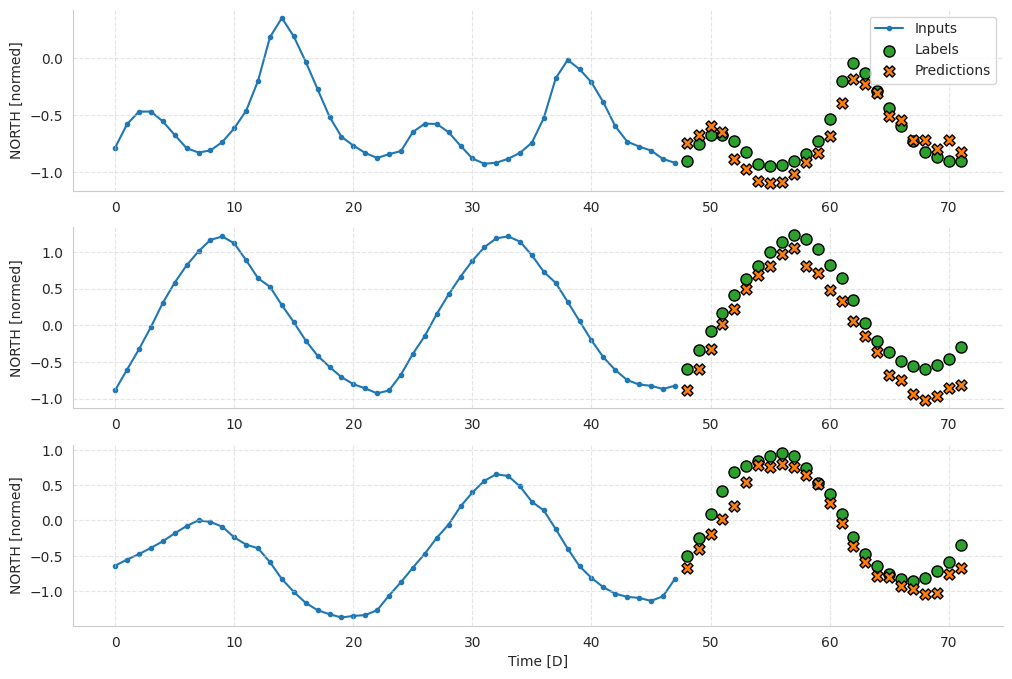

In [188]:
#wavenet_v1.save(folders_nn+f'wavenet_v1')
wavenet_v3 = tf.keras.models.load_model(folders_nn+'wavenet_v5')

multi_val_performance['wavenet_v3'] = wavenet_v3.evaluate(data_gen.val)
multi_performance['wavenet_v3'] = wavenet_v3.evaluate(data_gen.test)
data_gen.plot(wavenet_v3)

In [189]:
multi_performance

{'Repeat': [0.29796865582466125, 0.36136215925216675, 0.5458650588989258],
 'LSTM': [0.3687010705471039, 0.43924644589424133, 0.597797691822052],
 'CNN_v0': [0.21508407592773438, 0.3282665014266968, 0.4637715816497803],
 'CNN_v1': [0.2636370360851288, 0.36930766701698303, 0.5134559869766235],
 'trans_v1': [0.26692530512809753, 0.37159082293510437, 0.5166481137275696],
 'encdec_v1': [0.2757013440132141, 0.37721380591392517, 0.5250727534294128],
 'encdec_v2': [0.30834993720054626, 0.41231319308280945, 0.5552927255630493],
 'trans_v3': [0.3078506886959076, 0.4003477096557617, 0.5548429489135742],
 'wavenet_v1': [0.24972355365753174, 0.35704752802848816, 0.4997234344482422],
 'wav_Lstm_v1': [0.29484450817108154, 0.38775742053985596, 0.542995810508728],
 'wav_Lstm_v3': [0.34364449977874756, 0.4135718047618866, 0.5862119793891907],
 'wavenet_v3': [0.21533270180225372, 0.3354763984680176, 0.46403953433036804]}

In [190]:
multi_val_performance

{'Repeat': [0.08807235956192017, 0.21613632142543793, 0.2967698276042938],
 'LSTM_v1': [0.09903813898563385, 0.22314530611038208, 0.2961405813694],
 'CNN_v0': [0.08383399248123169, 0.2141568809747696, 0.28954100608825684],
 'CNN_v1': [0.09807891398668289, 0.24250392615795135, 0.3131755292415619],
 'trans_v1': [0.0790049210190773, 0.21647338569164276, 0.28107815980911255],
 'encdec_v1': [0.07736872136592865, 0.20768126845359802, 0.27815237641334534],
 'encdec_v2': [0.08553111553192139, 0.22173120081424713, 0.29245704412460327],
 'trans_v3': [0.09036879241466522, 0.23256491124629974, 0.30061402916908264],
 'wavenet_v1': [0.08249982446432114, 0.2132948637008667, 0.2872277796268463],
 'wav_Lstm_v1': [0.08520340174436569,
  0.22131623327732086,
  0.29189616441726685],
 'wav_Lstm_v3': [0.08422792702913284, 0.2214747816324234, 0.2902204990386963],
 'wavenet_v3': [0.08325723558664322, 0.21963736414909363, 0.28854331374168396]}

### 5.14 Temporal Fusion Transformer:

Based on these articles:
- [Keras Notebook](https://keras.io/examples/structured_data/classification_with_grn_and_vsn/)
- [Github Notebook](https://github.com/greatwhiz/tft_tf2/blob/master/libs/tft_model.py)


**Define some data caracteristics:**

In [191]:
a,b = data_gen.example

n_outputs = b.shape[-1]
num_features = a.shape[-1]

encoding_size = 8

print(f"Total Inputs: {num_features}, Total Output: {n_outputs}, Encoding Size: {encoding_size}")

Total Inputs: 6, Total Output: 4, Encoding Size: 8


**Encode model inputs**

In [192]:
def encode_inputs_dense(inputs, encoding_size, num_features=num_features):
    encoded_features = []
    for n_feature in range(num_features):
      # Project the numeric feature to encoding_size using linear transformation.
      x = tf.keras.layers.Lambda(lambda x: x[:, :, n_feature])(inputs)
      encoded_feature = tf.expand_dims(x, -1)
      encoded_feature = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=encoding_size), name=f"dense_enc_{n_feature}")(encoded_feature)
      encoded_features.append(encoded_feature)
    return encoded_features

def encode_inputs_gru(inputs, encoding_size):
    encoded_features = []
    for n_feature in range(num_features):
      # Project the numeric feature to encoding_size using linear transformation.
      x = tf.keras.layers.Lambda(lambda x: x[:, :, n_feature])(inputs)
      encoded_feature = tf.expand_dims(x, -1)
      encoded_feature = tf.keras.layers.GRU(units=encoding_size, return_sequences=True, name=f"gru_enc_{n_feature}")(encoded_feature)
      encoded_features.append(encoded_feature)
    return encoded_features

def encode_inputs_lstm(inputs, encoding_size):
    encoded_features = []
    for n_feature in range(num_features):
      # Project the numeric feature to encoding_size using linear transformation.
      x = tf.keras.layers.Lambda(lambda x: x[:, :, n_feature])(inputs)
      encoded_feature = tf.expand_dims(x, -1)
      encoded_feature = tf.keras.layers.LSTM(units=encoding_size, return_sequences=True, name=f"lstm_enc_{n_feature}")(encoded_feature)
      encoded_features.append(encoded_feature)
    return encoded_features

**Implement the Gated Linear Unit**

It differs from the model in Keras website since the dropout layer is taken back inside the GatedLinearUnit and it is not a layer within the GatedResidualNetwork. By that, this approach is consistent with the paper in the link above, where the the dropout layer is embed into the "apply_gating_layer".

In [255]:
class GatedLinearUnit(layers.Layer):
    def __init__(self, units,dropout_rate=None):
        super().__init__()
        self.linear = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units))
        self.sigmoid = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units, activation="sigmoid"))
        self.dr = dropout_rate
        if dropout_rate is not None:
          self.dropout = tf.keras.layers.Dropout(dropout_rate)

    def call(self, inputs):
        if self.dr is not None:
          inputs = self.dropout(inputs)
        return self.linear(inputs) * self.sigmoid(inputs)

class GatedLSTMUnit(layers.Layer):
    def __init__(self, units,dropout_rate=None):
        super().__init__()
        self.linear = tf.keras.layers.LSTM(units, dropout=dropout_rate)
        self.sigmoid = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units, activation="sigmoid"))

    def call(self, inputs):
        return self.linear(inputs) * self.sigmoid(inputs)

* **Implement the Gated Residual Network**

The Gated Residual Network (GRN) works as follows:

1. Applies the nonlinear ELU transformation to the inputs.
2. Applies linear transformation followed by dropout.
3. Applies GLU and adds the original inputs to the output of the GLU to perform skip (residual) connection.
4. Applies layer normalization and produces the output.

In [256]:
class GatedResidualNetwork(layers.Layer):
    def __init__(self, units, dropout_rate):
        super().__init__()
        self.units = units
        self.elu_dense = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units, activation="elu"))
        self.linear_dense = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units))
        self.gated_linear_unit = GatedLinearUnit(units,dropout_rate=dropout_rate)
        self.layer_norm = tf.keras.layers.LayerNormalization()
        self.project = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units))

    def call(self, inputs):
        x = self.elu_dense(inputs)
        x = self.linear_dense(x)
        if inputs.shape[-1] != self.units:
            inputs = self.project(inputs)
        x = inputs + self.gated_linear_unit(x)
        x = self.layer_norm(x)
        return x

class GatedResidualLSTMNetwork(layers.Layer):
    def __init__(self, units, dropout_rate):
        super().__init__()
        self.units = units
        self.elu_dense = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units, activation="elu"))
        self.linear_dense = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units))
        self.gated_lstm_unit = GatedLSTMUnit(units,dropout_rate=dropout_rate)
        self.layer_norm = tf.keras.layers.LayerNormalization()
        self.project = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units))

    def call(self, inputs):
        x = self.elu_dense(inputs)
        x = self.linear_dense(x)
        if inputs.shape[-1] != self.units:
            inputs = self.project(inputs)
        x = inputs + self.gated_lstm_unit(x)
        x = self.layer_norm(x)
        return x

* **Implement the Variable Selection Network**
The Variable Selection Network (VSN) works as follows:

- Applies a GRN to each feature individually.
- Applies a GRN on the concatenation of all the features, followed by a softmax to produce feature weights.
- Produces a weighted sum of the output of the individual GRN.

Note that the output of the VSN is [batch_size, encoding_size], regardless of the number of the input features.

In [257]:
input_sequence_length=48
num_features = 6
encoding_size = 4
dropout_rate=0.3

In [274]:
class VariableSelection(layers.Layer):
    def __init__(self, num_features, units=encoding_size, dropout_rate=dropout_rate):
        super().__init__()
        self.grns = list()
        # Create a GRN for each feature independently
        for idx in range(num_features):
            grn = GatedResidualNetwork(units, dropout_rate)
            self.grns.append(grn)
        # Create a GRN for the concatenation of all the features
        self.grn_concat = GatedResidualNetwork(units, dropout_rate)
        self.softmax = tf.keras.layers.Dense(units=num_features, activation="softmax")
        self.dense = tf.keras.layers.Dense(1)
        self.mult = tf.keras.layers.Multiply()

    def call(self, inputs):
        v = layers.concatenate(inputs)
        v = self.grn_concat(v)
        v = self.softmax(v)

        x = []
        for idx, input in enumerate(inputs):
            x.append(self.grns[idx](input))
        x = tf.stack(x, axis=2)  # If axis=2 then set transpose_a to False
        x = self.dense(x)
        x = tf.squeeze(x, axis=-1)

        outputs = self.mult([v, x])
        return outputs


class VariableLSTMSelection(layers.Layer):
    def __init__(self, num_features, units=encoding_size, dropout_rate=dropout_rate):
        super().__init__()
        self.grns = list()
        # Create a GRN for each feature independently
        for idx in range(num_features):
            grn = GatedResidualLSTMNetwork(units, dropout_rate)
            self.grns.append(grn)
        # Create a GRN for the concatenation of all the features
        self.grn_concat = GatedResidualLSTMNetwork(units, dropout_rate)
        self.softmax = tf.keras.layers.Dense(units=num_features, activation="softmax")

    def call(self, inputs):
        v = layers.concatenate(inputs)
        v = self.grn_concat(v)
        v = self.softmax(v)

        x = []
        for idx, input in enumerate(inputs):
            x.append(self.grns[idx](input))
        x = tf.stack(x, axis=2)  # If axis=2 then set transpose_a to False

        x = tf.squeeze(tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.L1(0.01))(x), axis=-1)

        outputs = tf.keras.layers.Multiply()([v, x])
        return outputs

In [289]:
input_sequence_length=48
num_features = 6
encoding_size = 8

def TFT_model(sequence_length=input_sequence_length, num_features=num_features, dropout=0.3, encoding_size=encoding_size):

    ####################################################### INPUTS #######################################################
    model_input = tf.keras.layers.Input(shape=(sequence_length, num_features))

#    feature_list_dense = encode_inputs_dense(model_input, encoding_size)
    feature_list_rnn = encode_inputs_lstm(model_input, encoding_size)

   # total_features = len(feature_list_dense)

    final_output_0 = VariableSelection(num_features=num_features, units=encoding_size, dropout_rate=dropout)(feature_list_rnn)
#    final_output_1 = VariableLSTMSelection(num_features=num_features, units=encoding_size, dropout_rate=dropout)(feature_list_rnn)



#    final_output_0 = tf.squeeze(tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.L1(0.01))(final_output_0), axis=-1)
#    final_output_1 = tf.squeeze(tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.L1(0.01))(final_output_1), axis=-1)

    final_output_0 = tf.keras.layers.LayerNormalization()(final_output_0)
#    final_output_1 = tf.keras.layers.LayerNormalization()(final_output_1)

#    final_output_0 = GatedResidualNetwork(4, dropout_rate=dropout)(final_output_0)
#    final_output_1 = GatedResidualNetwork(4, dropout_rate=dropout)(final_output_1)


    final_output_0 = tf.keras.layers.LSTM(24*4)(final_output_0)
#    final_output_1 = tf.keras.layers.LSTM(24*4)(final_output_1)


    final_output_0 = tf.keras.layers.Reshape([24, 4])(final_output_0)
#    final_output_1 = tf.keras.layers.Reshape([24, 4])(final_output_1)



    # Creating and compiling the model

    model_instance = tf.keras.Model(inputs=[model_input], outputs=[
        final_output_0])





    model_instance.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                               loss=tf.keras.losses.MeanSquaredError(),
                               metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
                                        tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
                                 ])

    return model_instance

In [290]:
tft_model = TFT_model()
tft_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 48, 6)]      0           []                               
                                                                                                  
 lambda_18 (Lambda)             (None, 48)           0           ['input_3[0][0]']                
                                                                                                  
 lambda_19 (Lambda)             (None, 48)           0           ['input_3[0][0]']                
                                                                                                  
 lambda_20 (Lambda)             (None, 48)           0           ['input_3[0][0]']                
                                                                                            

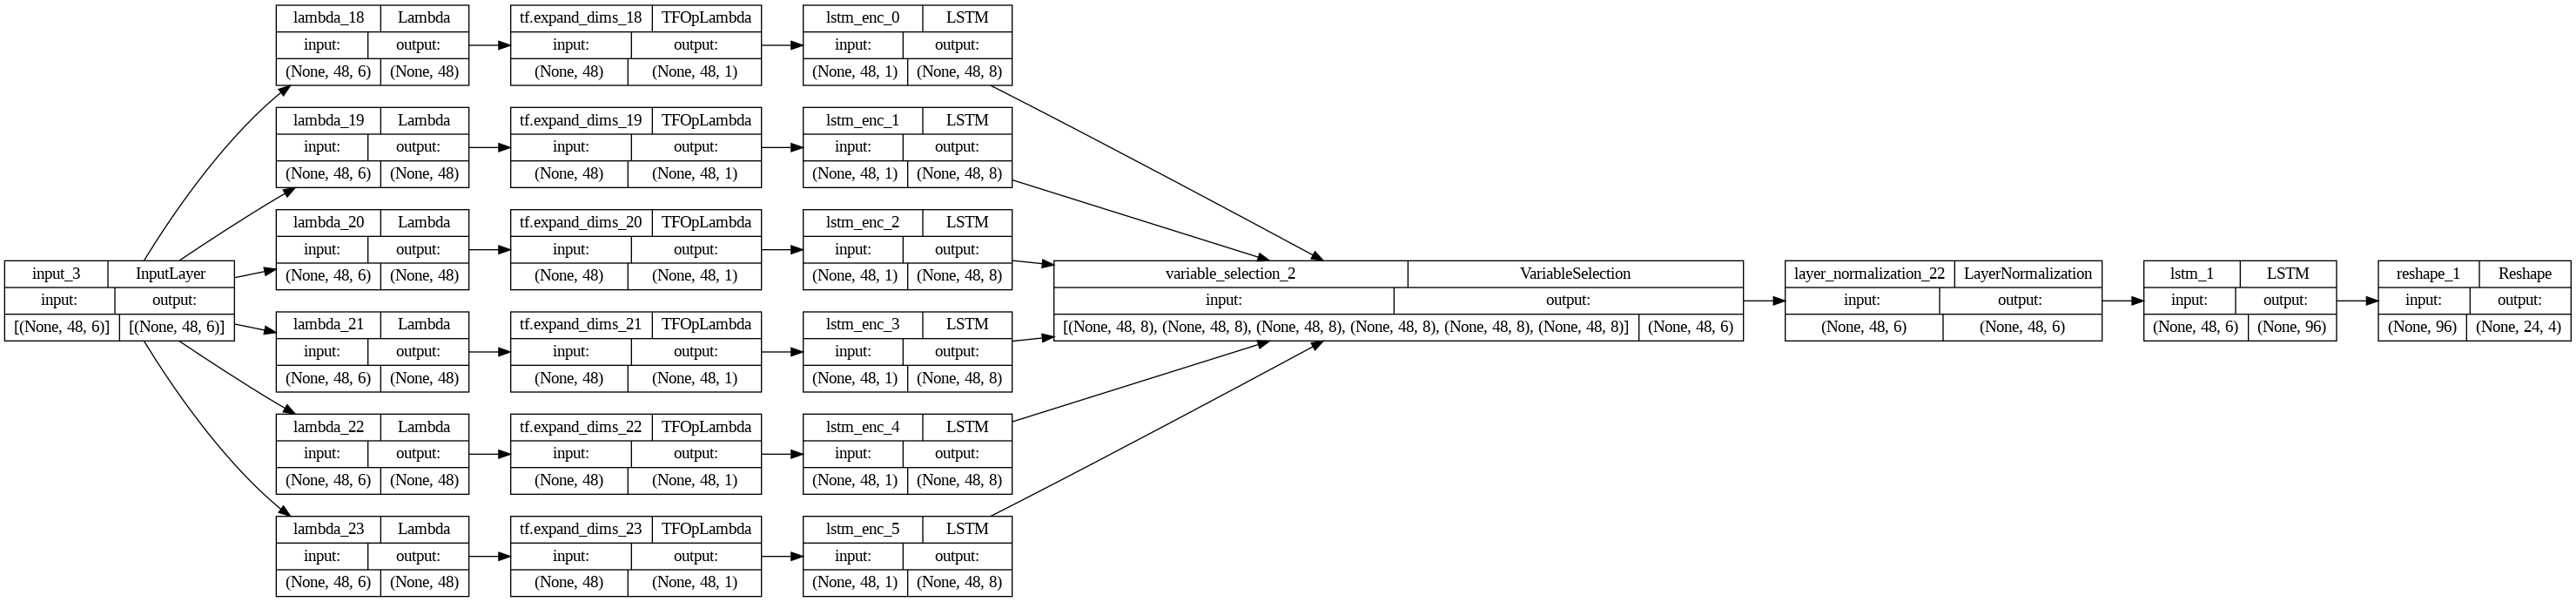

In [291]:
tf.keras.utils.plot_model(tft_model,to_file="model.png",show_shapes=True,show_dtype=False,show_layer_names=True,rankdir="LR",
                           expand_nested=True,dpi=96,layer_range=None,show_layer_activations=False,show_trainable=False)

In [292]:
print('Input shape:', data_gen.example[0].shape)
print('Labels shape:', data_gen.example[1].shape)
print('Output shape:', tft_model(data_gen.example[0]).shape)

Input shape: (32, 48, 6)
Labels shape: (32, 24, 4)
Output shape: (32, 24, 4)


#### 5.14.1 Keras Tuner:

In [293]:
# Define the hyperparameter search space: EXPERIMENT 0
# wavenet_model_v2(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4,n_blocks=4,units_0=64):
hp = kt.HyperParameters()
hp.Choice('encoding_size', values=[4,8,16,32]);
hp.Choice('dropout', values=[0.3,0.4,0.5,0.7]);

In [294]:
# TRAIN MODEL seq2seq_attention_model(input_sequence_length=48, forecast_horizon=24, num_features=6, num_forecast_features=4)
# Define Preprocessing steps:

class tft_optim(kt.HyperModel):
  def build(self, hp):

    model = TFT_model(dropout=hp.get("dropout"),encoding_size=hp.get("encoding_size"))

    return model

In [295]:
# Create a tuner and search for the best hyperparameters
tuner = GridSearch(tft_optim(), objective=kt.Objective("val_mean_absolute_error",direction="min"), hyperparameters=hp, overwrite=True)
tuner.search(data_gen.train, validation_data=data_gen.val, epochs=30)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
4                 |4                 |encoding_size
0.3               |0.3               |dropout

Epoch 1/30
190/190 [==============================] - 33s 49ms/step - loss: 1.0251 - mean_absolute_error: 0.8266 - rmse_score: 1.0038 - val_loss: 0.8726 - val_mean_absolute_error: 0.8057 - val_rmse_score: 0.9267
Epoch 2/30
190/190 [==============================] - 6s 32ms/step - loss: 1.0160 - mean_absolute_error: 0.8257 - rmse_score: 1.0026 - val_loss: 0.8685 - val_mean_absolute_error: 0.8067 - val_rmse_score: 0.9276
Epoch 3/30
190/190 [==============================] - 6s 31ms/step - loss: 1.0103 - mean_absolute_error: 0.8252 - rmse_score: 1.0023 - val_loss: 0.8625 - val_mean_absolute_error: 0.8058 - val_rmse_score: 0.9267
Epoch 4/30
189/190 [============================>.] - ETA: 0s - loss: 1.0070 - mean_absolute_error: 0.8254 - rmse_score: 1.0024

KeyboardInterrupt: ignored

In [ ]:
print("Best Model:")

best_hyper = tuner.get_best_hyperparameters()[0].values
tuner.get_best_hyperparameters()[0].values

In [ ]:
print("Runner-up Model:")

runnerup_hyper = tuner.get_best_hyperparameters(num_trials=2)[1].values
tuner.get_best_hyperparameters(num_trials=2)[1].values

In [ ]:
tuner.results_summary(num_trials=4)

In [ ]:
best_model = tuner.get_best_models(num_models=2)

best_model[0].save(folders_nn+f'wavenet_v5')
best_model[1].save(folders_nn+f'wavenet_v6')

wavenet_model_v1 = tf.keras.models.load_model(folders_nn+f'wavenet_v5')
wavenet_model_v2 = tf.keras.models.load_model(folders_nn+f'wavenet_v6')

wavenet_model_v1.save_weights(folders_nn+'wavenet_v5'+'/my_checkpoint_v1/')
wavenet_model_v2.save_weights(folders_nn+'wavenet_v6'+'/my_checkpoint_v2/')

In [ ]:
best_hyper = {'dropout': 0.4}
runner_hyper = {'dropout': 0.4}

wavenet_v3 = create_DC_CNN_Model(**best_hyper)
wavenet_v3.summary()

wavenet_v3.load_weights(folders_nn+'wavenet_v5'+'/my_checkpoint_v1/')

#### 5.11.2 Fit:

In [ ]:
seed_everything(SEED)
# Compile the Callbacks:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_mean_absolute_error",
                                          factor=0.5,
                                          patience=5,
                                          verbose=1,
                                          mode="min")

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_mean_absolute_error",
                                              patience=10,
                                              verbose=1,
                                              mode="min",
                                              restore_best_weights=True)

checkpoint_filepath = folders_nn + 'checkpoint/'
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                save_weights_only=True,
                                                monitor="val_mean_absolute_error",
                                                mode='min',
                                                restore_best_weights=True)


wavenet_v3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00001),
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
                            tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
                            ])

#wavenet_v2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005),
#                    loss=tf.keras.losses.MeanSquaredError(),
#                    metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
#                              tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
#                              ])

history = wavenet_v3.fit(data_gen.train, epochs=100,
                            validation_data=data_gen.val,
                            callbacks=[red_lr,early_stop,Checkpoint])

In [ ]:
#wavenet_v1.save(folders_nn+f'wavenet_v1')
#wavenet_v3 = tf.keras.models.load_model(folders_nn+'wavenet_v5')

multi_val_performance['wavenet_v3'] = wavenet_v3.evaluate(data_gen.val)
multi_performance['wavenet_v3'] = wavenet_v3.evaluate(data_gen.test)
data_gen.plot(wavenet_v3)

In [ ]:
multi_performance

In [ ]:
multi_val_performance

In [ ]:
input_sequence_length=48
num_features = 6
encoding_size = 8

def TFT_model(sequence_length=input_sequence_length,num_features=num_features,dropout=0.8, encoding_size=encoding_size):

    ####################################################### INPUTS #######################################################
    model_input = tf.keras.layers.Input(shape=(sequence_length, num_features))

    feature_list_dense = encode_inputs_dense(model_input, encoding_size)
    feature_list_rnn = encode_inputs_lstm(model_input, encoding_size)

    total_features = len(feature_list_dense)

    #final_output_0 = VariableSelection(num_features=total_features, units=encoding_size, dropout_rate=0.3)(feature_list_dense)
    #final_output_1 = VariableLSTMSelection(num_features=total_features, units=encoding_size, dropout_rate=0.3)(feature_list_rnn)



    final_output_0 = layers.concatenate(feature_list_dense)
    final_output_1 = layers.concatenate(feature_list_rnn)

    final_output_0 = tf.keras.layers.LayerNormalization()(final_output_0)
    final_output_1 = tf.keras.layers.LayerNormalization()(final_output_1)

    v = GatedResidualNetwork(units=encoding_size, dropout_rate=dropout)(final_output_0)
    #v = tf.expand_dims(tf.keras.layers.Dense(units=num_features, activation="softmax")(v), axis=-1)
    v = tf.keras.layers.Dense(units=num_features, activation="softmax")(v)  #HERE

    grns = list()

    # Create a GRN for each feature independently
    for idx in range(num_features):
        grn = GatedResidualNetwork(units=encoding_size, dropout_rate=dropout)
        grns.append(grn)


    x = []
    for idx, input in enumerate(feature_list_dense):
        x.append(grns[idx](input))

    x = tf.stack(x, axis=2)

    #outputs = tf.squeeze(tf.matmul(v, x, transpose_a=True), axis=1)   #HERE
    outputs = tf.matmul(v, x, transpose_a=False)
    #final_output = layers.concatenate([final_output_0,final_output_1])
    #final_output = tf.matmul(final_output_0, final_output_1, transpose_a=True)
    #final_output = tf.keras.layers.Multiply()([final_output_0, final_output_1])



    #final_output = tf.keras.layers.Multiply()([final_output_0,
                                               #final_output_1
                                               #])

    # Creating and compiling the model
    model_instance = tf.keras.Model(inputs=[model_input], outputs=[
        outputs])


    model_instance.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005),
                               loss=tf.keras.losses.MeanSquaredError(),
                               metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
                                        tf.keras.metrics.RootMeanSquaredError(name='rmse_score')
                                 ])

    return model_instance

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Attention, Concatenate
from tensorflow.keras.models import Model

num_samples = 1000
input_sequence_length = 10
forecast_horizon = 5
num_features = 1

# Generate random time series data for demonstration purposes
X = np.random.rand(num_samples, input_sequence_length, num_features)
y = np.random.rand(num_samples, forecast_horizon, num_features)

# Define the Seq2Seq model
def seq2seq_attention_model(input_sequence_length, forecast_horizon, num_features):
    # Encoder input
    encoder_inputs = Input(shape=(input_sequence_length, num_features))

    # Encoder LSTM layer
    encoder_lstm = LSTM(units=64, return_sequences=True, return_state=True)
    encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)

    # Discard the encoder outputs and only keep the states
    encoder_states = [state_h, state_c]

    # Decoder input
    decoder_inputs = Input(shape=(forecast_horizon, num_features))

    # Decoder LSTM layer
    decoder_lstm = LSTM(units=64, return_sequences=True, return_state=True)

    # Use Attention mechanism
    attention_layer = Attention()

    # Initialize the decoder LSTM with encoder_states and decoder_inputs
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

    # Apply attention
    attention_output = attention_layer([decoder_outputs, encoder_outputs])

    # Element-wise multiplication of attention output and decoder LSTM output
    decoder_combined_context = tf.multiply(attention_output, decoder_outputs)

    # Final dense layer for prediction
    decoder_dense = Dense(num_features)
    decoder_outputs = decoder_dense(decoder_combined_context)

    # Create the model
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

    return model

# Compile the model
model = seq2seq_attention_model(input_sequence_length, forecast_horizon, num_features)
model.compile(optimizer='adam', loss='mse')

# Train the model
model.summary()